# Credit Card Users Churn Prediction
*by: Gopesh Khandelwal*

## <span style="color:blue">Problem Statement

### Business Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

You as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

### Data Description

* CLIENTNUM: Client number. Unique identifier for the customer holding the account
* Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
* Customer_Age: Age in Years
* Gender: Gender of the account holder
* Dependent_count: Number of dependents
* Education_Level: Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to college student), Post-Graduate, Doctorate
* Marital_Status: Marital Status of the account holder
* Income_Category: Annual Income Category of the account holder
* Card_Category: Type of Card
* Months_on_book: Period of relationship with the bank (in months)
* Total_Relationship_Count: Total no. of products held by the customer
* Months_Inactive_12_mon: No. of months inactive in the last 12 months
* Contacts_Count_12_mon: No. of Contacts in the last 12 months
* Credit_Limit: Credit Limit on the Credit Card
* Total_Revolving_Bal: Total Revolving Balance on the Credit Card
* Avg_Open_To_Buy: Open to Buy Credit Line (Average of last 12 months)
* Total_Amt_Chng_Q4_Q1: Change in Transaction Amount (Q4 over Q1)
* Total_Trans_Amt: Total Transaction Amount (Last 12 months)
* Total_Trans_Ct: Total Transaction Count (Last 12 months)
* Total_Ct_Chng_Q4_Q1: Change in Transaction Count (Q4 over Q1)
* Avg_Utilization_Ratio: Average Card Utilization Ratio

#### What Is a Revolving Balance?

- If we don't pay the balance of the revolving credit account in full every month, the unpaid portion carries over to the next month. That's called a revolving balance


##### What is the Average Open to buy?

- 'Open to Buy' means the amount left on your credit card to use. Now, this column represents the average of this value for the last 12 months.

##### What is the Average utilization Ratio?

- The Avg_Utilization_Ratio represents how much of the available credit the customer spent. This is useful for calculating credit scores.


##### Relation b/w Avg_Open_To_Buy, Credit_Limit and Avg_Utilization_Ratio:

- ( Avg_Open_To_Buy / Credit_Limit ) + Avg_Utilization_Ratio = 1

## <span style="color:blue">Importing necessary libraries

In [1]:
# Libraries needed

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

from xgboost import XGBClassifier
from sklearn.ensemble import (AdaBoostClassifier,
                              BaggingClassifier,
                              GradientBoostingClassifier,
                              RandomForestClassifier,
                              )
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report,
                             confusion_matrix,
                             accuracy_score,
                             recall_score,
                             precision_score,
                             f1_score,
                             make_scorer
                             )

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

* Libraries successfully loaded.

In [2]:
# Preventing scientific notation.
pd.set_option("display.float_format", lambda x: "%.3f" % x)

* Code ran to block scientific notation.

## <span style="color:blue">Loading the dataset

In [3]:
# Importing and mounting google drive to access the data in colab.

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


* Accessing google drive to save/read data.

In [4]:
# Saving the path of the .csv file.
path = '/content/drive/MyDrive/BankChurners.csv'
# Creating the data frame, data, to load the .csv to the notebook
data = pd.read_csv(path)
# Creating copy of the data frame, df, to keep the original data unaltered.
df = data.copy()

* Loaded data into a pandas dataframe named data.
* Created a copy of data frame called df to keep original data unmodified.

## <span style="color:blue">Data Overview

In [5]:
# Shape of the data frame.
df.shape

(10127, 21)

* The data set has 10,127 rows and 21 columns.

In [6]:
# Top 5 rows of the data frame.
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,...,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [7]:
# Last 5 rows of the data frame.
df.tail()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.000,1851,2152.000,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,...,2,3,4277.000,2186,2091.000,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.000,0,5409.000,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,...,3,3,5281.000,0,5281.000,0.535,8395,62,0.722,0.000
10126,714337233,Attrited Customer,43,F,2,Graduate,Married,Less than $40K,Silver,25,...,2,4,10388.000,1961,8427.000,0.703,10294,61,0.649,0.189


In [8]:
# Details on the columns within the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           8608 non-null   object 
 6   Marital_Status            9378 non-null   object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

* All columns except 6 are numerical columns. The other 6 are of the object data type.
* 19 columns have no null values, 2 columns have null values.

In [9]:
# Checking the data frame for duplicate values.
df.duplicated().value_counts()

False    10127
Name: count, dtype: int64

* There are no duplicated entries (rows).

In [10]:
# Checking the data frame for na values.
df.isna().sum()

CLIENTNUM                      0
Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category                0
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* `Education_Level` has 1519 null values.
* `Marital_Status` has 749 null values.

In [11]:
# Statistical summary of the columns with data type of "Int64" and "Float64".
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CLIENTNUM,10127.000,739177606.334,36903783.450,708082083.000,713036770.500,717926358.000,773143533.000,828343083.000
Customer_Age,10127.000,46.326,8.017,26.000,41.000,46.000,52.000,73.000
Dependent_count,10127.000,2.346,1.299,0.000,1.000,2.000,3.000,5.000
Months_on_book,10127.000,35.928,7.986,13.000,31.000,36.000,40.000,56.000
Total_Relationship_Count,10127.000,3.813,1.554,1.000,3.000,4.000,5.000,6.000
Months_Inactive_12_mon,10127.000,2.341,1.011,0.000,2.000,2.000,3.000,6.000
Contacts_Count_12_mon,10127.000,2.455,1.106,0.000,2.000,2.000,3.000,6.000
Credit_Limit,10127.000,8631.954,9088.777,1438.300,2555.000,4549.000,11067.500,34516.000
Total_Revolving_Bal,10127.000,1162.814,814.987,0.000,359.000,1276.000,1784.000,2517.000
Avg_Open_To_Buy,10127.000,7469.140,9090.685,3.000,1324.500,3474.000,9859.000,34516.000


**Observations**
* `CLIENTNUM` is unique for all customers and will not be useful for analysis. This column will be dropped later.
* `Customer_Age` has a mean of 46 years, a min of 26, and a max of 73 years.
* `Dependent_count` has a mean of 2.3 dependents, a min of 0, and a max of 5 dependents.
* `Months_on_book` has a mean of 35.9 months, a min of 13, and a max of 56 months.
* `Total_Relationship_Count` has a mean of 3.8 products with the bank, a min of 1, and a max of 6 products with the bank.
* `Months_Inactive_12_mon` has a mean of 2.3 months, a min of 0, and a max of 6 months.
* `Contacts_Count_12_mon` has a mean of 2.4 times contacted, a min of 0, and a max of 6 contacts.
* `Credit_Limit` has a mean of 8632 dollars, a min of 1438, and a max of 34516 dollars (rounded to nearest dollar). This is a very large range.
* `Total_Revolving_Bal` has a mean of 1163 dollars, a min of 0, and a max of 2517.
* `Avg_Open_To_Buy` has a mean of 7469 dollars, a min of 3, and a max of 34516 dollar. This is a very large range.
* `Total_Amt_Chng_Q4_Q1` has a mean of 0.76, a min of 0, and a max of 3.397. This is a ratio of amount spent in Q4 to amount spend in Q1 (Q4/Q1).
* `Total_Trans_Amt` has a mean of 4404 dollars, a min of 510, and a max of 18484 dollars.
* `Total_Trans_Ct` has a mean of 64.8 total transactions, min of 10, and a max of 139 total transactions.
* `Total_Ct_Chng_Q4_Q1` has a mean 0.71, a min of 0, and a max of 3.71. This is a ratio of number of transactions in Q4 to number of transactions in Q1 (Q4/Q1).
* `Avg_Utilization_Ratio` has a mean of 27.5%, a min of 0%, and a max of 99.9%. This is the customers percent of credit used.

In [12]:
# Statistical summary of the columns with data type of "object".
df.describe(include=["object"]).T

,count,unique,top,freq
Attrition_Flag,10127,2,Existing Customer,8500
Gender,10127,2,F,5358
Education_Level,8608,6,Graduate,3128
Marital_Status,9378,3,Married,4687
Income_Category,10127,6,Less than $40K,3561
Card_Category,10127,4,Blue,9436


**Observations**
* `Attrition_Flag` has 10127 non-null entries and 2 unique entries, with the most frequent being "Existing Customer".
* `Gender` has 10127 non-null entries and 2 unique entries, with the most frequent being "F".
* `Education_Level` has 8608 non-null entries and 6 unique entries, with the most frequent being "Graduate". *Null values are present and will be imputed after data is split into training, validation, and test sets to avoid data leakage.*
* `Marital_Status` has 9369 non-null entries and 3 unique entries, with the most frequent being "Married". *Null values are present and will be imputed after data is split into training, validation, and test sets to avoid data leakage.*
* `Income_Category` has 10127 non-null entries and 6 unique entries, with the most frequent being "Less than 40k"
* `Card_Category` has 10127 non-null entries and 4 unique entries, with the most frequent being "Blue".

In [13]:
# Checking the percentages of classes in the target variable column.
df['Attrition_Flag'].value_counts(1)

Attrition_Flag
Existing Customer   0.839
Attrited Customer   0.161
Name: proportion, dtype: float64

* 83.9% of customers are existing customers.

## <span style="color:blue">Data Preprocessing

Dropping "CLIENTNUM" column as it is not relevant for analysis.

In [14]:
# Dropping "CLIENTNUM" column beacuse it is unnecessary information for analysis.
df = df.drop('CLIENTNUM', axis=1)

In [15]:
## Encoding Existing and Attrited customers to 1 and 0 respectively, for analysis.
df["Attrition_Flag"].replace("Existing Customer", 1, inplace=True)
df["Attrition_Flag"].replace("Attrited Customer", 0, inplace=True)

* Encoding "Existing Customer" to 1 and "Attrited Customer" to 0 to use in models.

In [16]:
# Top 5 rows of the new data frame.
df.head()

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,1,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000,777,11914.000,1.335,1144,42,1.625,0.061
1,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000,864,7392.000,1.541,1291,33,3.714,0.105
2,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000,0,3418.000,2.594,1887,20,2.333,0.000
3,1,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.000,2517,796.000,1.405,1171,20,2.333,0.760
4,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000,0,4716.000,2.175,816,28,2.500,0.000


In [17]:
# Checking the values of the Income_Category column.
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: count, dtype: int64

* Observed 1112 entries of "abc" in the `Income_Category` column.

In [18]:
# Replacing "abc" entries in the Income_Category column with np.nan.
df['Income_Category'].replace('abc', np.nan, inplace=True)

* Replaced values of "abc" with "np.nan" (i.e. not a number).

In [19]:
# Checking the new values of the Income_Category column.
df['Income_Category'].value_counts()

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: count, dtype: int64

* Observed "abc" values have been replaced.

In [20]:
# Observing the amount of non-null values in the Income_Category column.
df['Income_Category'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10127 entries, 0 to 10126
Series name: Income_Category
Non-Null Count  Dtype 
--------------  ----- 
9015 non-null   object
dtypes: object(1)
memory usage: 79.2+ KB


* Null values will be imputed after splitting data into traning, validation, and test sets to avoid data leakage.

In [21]:
# Creating a list with column labels that need to be converted from "object" to "category" data type.
cat_cols = [
    'Attrition_Flag',
    'Gender',
    'Education_Level',
    'Marital_Status',
    'Card_Category',
    'Income_Category'
]

# Converting the columns with "object" data type to "category" data type.
df[cat_cols] = df[cat_cols].astype('category')

* Converted columns with data type of "object" to "category" for use in analysis.

In [22]:
# Observing the data types of the new data frame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition_Flag            10127 non-null  category
 1   Customer_Age              10127 non-null  int64   
 2   Gender                    10127 non-null  category
 3   Dependent_count           10127 non-null  int64   
 4   Education_Level           8608 non-null   category
 5   Marital_Status            9378 non-null   category
 6   Income_Category           9015 non-null   category
 7   Card_Category             10127 non-null  category
 8   Months_on_book            10127 non-null  int64   
 9   Total_Relationship_Count  10127 non-null  int64   
 10  Months_Inactive_12_mon    10127 non-null  int64   
 11  Contacts_Count_12_mon     10127 non-null  int64   
 12  Credit_Limit              10127 non-null  float64 
 13  Total_Revolving_Bal       10127 non-null  int6

* Observed the data types were changed to "category".

In [23]:
# Checking for new na values, will impute after train-test split to avoid data leakage.
df.isna().sum()

Attrition_Flag                 0
Customer_Age                   0
Gender                         0
Dependent_count                0
Education_Level             1519
Marital_Status               749
Income_Category             1112
Card_Category                  0
Months_on_book                 0
Total_Relationship_Count       0
Months_Inactive_12_mon         0
Contacts_Count_12_mon          0
Credit_Limit                   0
Total_Revolving_Bal            0
Avg_Open_To_Buy                0
Total_Amt_Chng_Q4_Q1           0
Total_Trans_Amt                0
Total_Trans_Ct                 0
Total_Ct_Chng_Q4_Q1            0
Avg_Utilization_Ratio          0
dtype: int64

* Observed new null values in `Income_Category` column.
* Null values will be imputed after splitting data into training, validation, and test sets to avoid data leakage.

## <span style="color:blue">Exploratory Data Analysis (EDA)

**Questions**:

**1. How is the total transaction amount distributed?**

The Total_Trans_Amt is right skewed, with a median of about 4000

**2. What is the distribution of the level of education of customers?**

The distribution of Education_Level:
Graduate degree - 36%
High school diploma - 23%
Uneducated - 17%
Bachelor's - 11.8%
Post-Graduate - 6%
Doctorate - 5.2%

**3. What is the distribution of the level of income of customers?**

The distribution of Income_Level:
Less than 40K - 39.9%
40k - 60k - 19.9%
80k - 120k - 17%
60k - 80k - 15.6%
120k+ - 8.1%

**4. How does the change in transaction amount between Q4 and Q1 (`total_ct_change_Q4_Q1`) vary by the customer's account status (`Attrition_Flag`)?**

Total_Ct_Chng_Q4_Q1 is much lower for attrited customers compared to existing customers. Attrited customers have a median of about 50 whereas existing customers have a median of closer to 70. The ratio of Q4 transaction counts to Q1 transaction counts (Q4/Q1) is much higher for existing customers indicating that attrited customers are spending less at the end of the year than existing customers

**5. How does the number of months a customer was inactive in the last 12 months (`Months_Inactive_12_mon`) vary by the customer's account status (`Attrition_Flag`)?**

Months_Inactice_12_mon does have some affect on attrition, but a clear pattern is not obvious. Customers with 0 months inactive have about a 50-50 chance of being attrited, but all other values are much less likely to attrition.


**6. What are the attributes that have a strong correlation with each other?**

Attributes with a strong correlation:
Avg_Open_to_Buy and Credit_Limit are completely positively correlated by necessity. As a customer's credit limit goes up, their open to buy also increases.
Total_Trans_Amt and Total_Trans_Ct are very highly positively correlated. This makes sense because the more transations a customer makes, the more the customer will spend.
Customer_Age and Months_on_book are highly positively correlated. This makes sense because as customers age, their time with the bank increases.
Total_Revolving balance and Avg_Utilization_Ratio is positively correlated. This makes sense because if a customer has a high utilization, they will likely have a higher revolving balance.
Avg_Open_To_Buy and Avg_Utilization_Ratio are negatively correlated. This is because the higher a customers utilization is, the less their amount open to buy will be.
Credit_Limit and Avg_Utilization_Ratio are negatively correlated. This is because customers with a higher credit limit tend to have a lower utilization.



#### The below functions need to be defined to carry out the Exploratory Data Analysis.

In [24]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [25]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [26]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [27]:
### Function to plot distributions

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=Existing Customer")
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=Attrited Customer")
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

**Customer_Age**

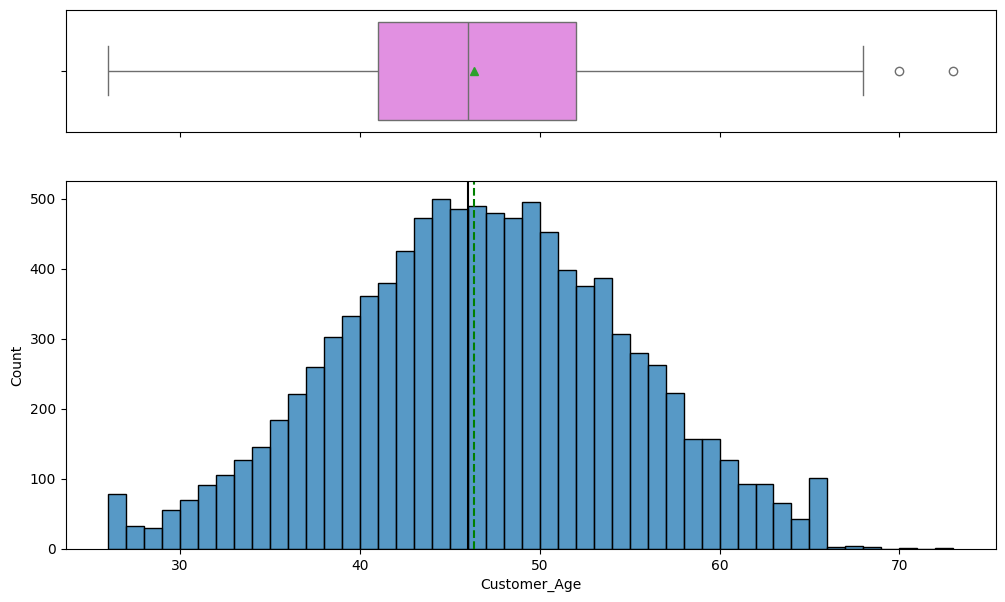

In [28]:
histogram_boxplot(df, 'Customer_Age')

* `Customer_Age` is normally distributed, with a median of 46 years.
* Not many outliers.

**Months_on_book**

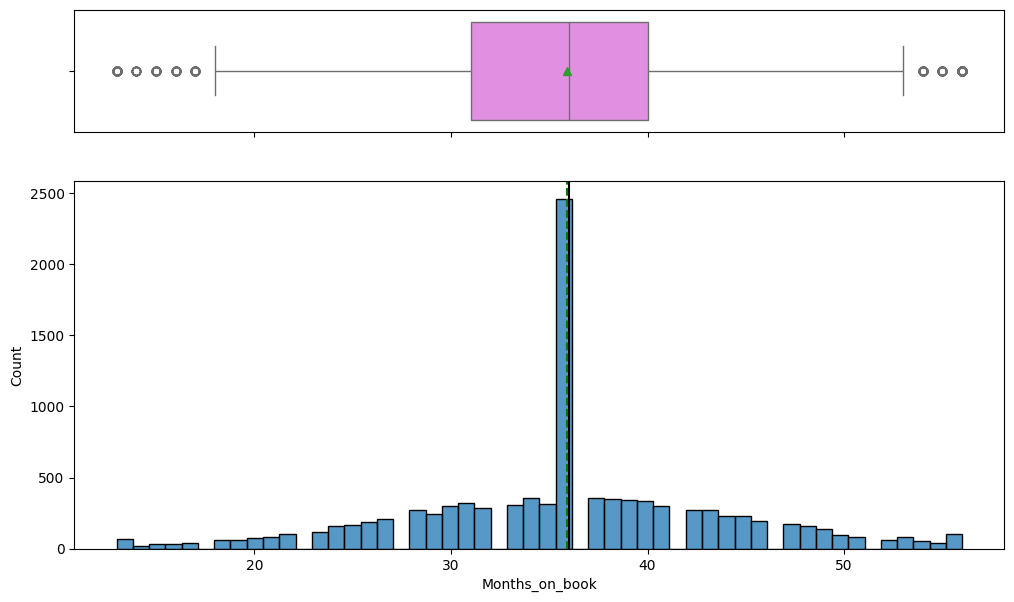

In [29]:
histogram_boxplot(df, 'Months_on_book')

In [30]:
df['Months_on_book'].value_counts(1).head(1)

Months_on_book
36   0.243
Name: proportion, dtype: float64

* `Months_on_book` is normally distributed with a very high frequency of the mode.
* 24% of the entries have 36 `Months_on_book`.
* Not many outliers.

**Credit_Limit**

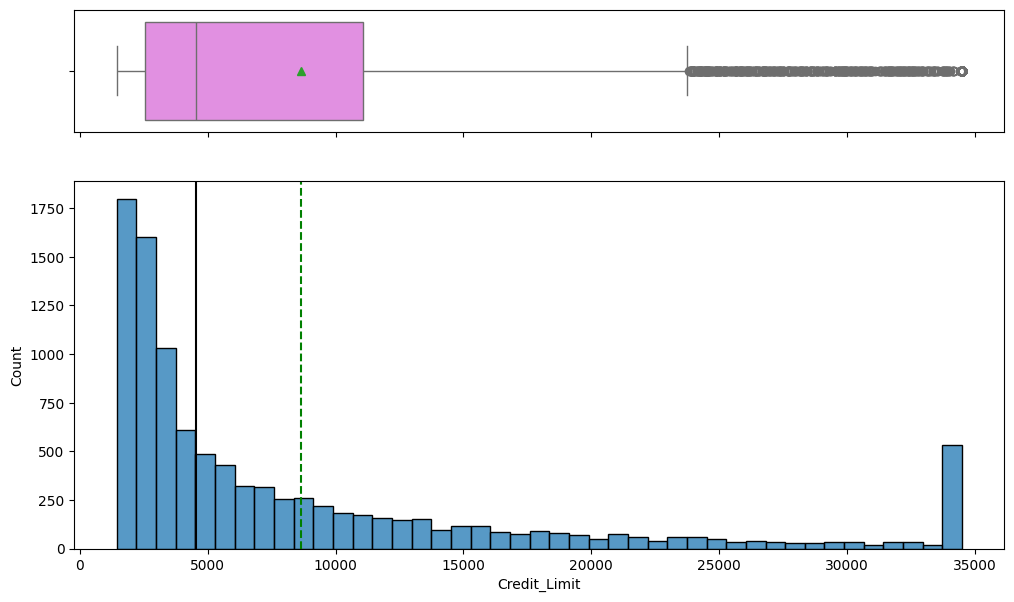

In [31]:
histogram_boxplot(df, 'Credit_Limit')

In [32]:
df['Credit_Limit'].min()

1438.3

* `Credit_Limit` is right skewed with many outliers. It seems like these values are just outside the range, but are actual credit limits.
* Minimum is 1438 dollars, since all customers have a credit line it is expected that the minimum is > 0.

**Total_Revolving_Bal**

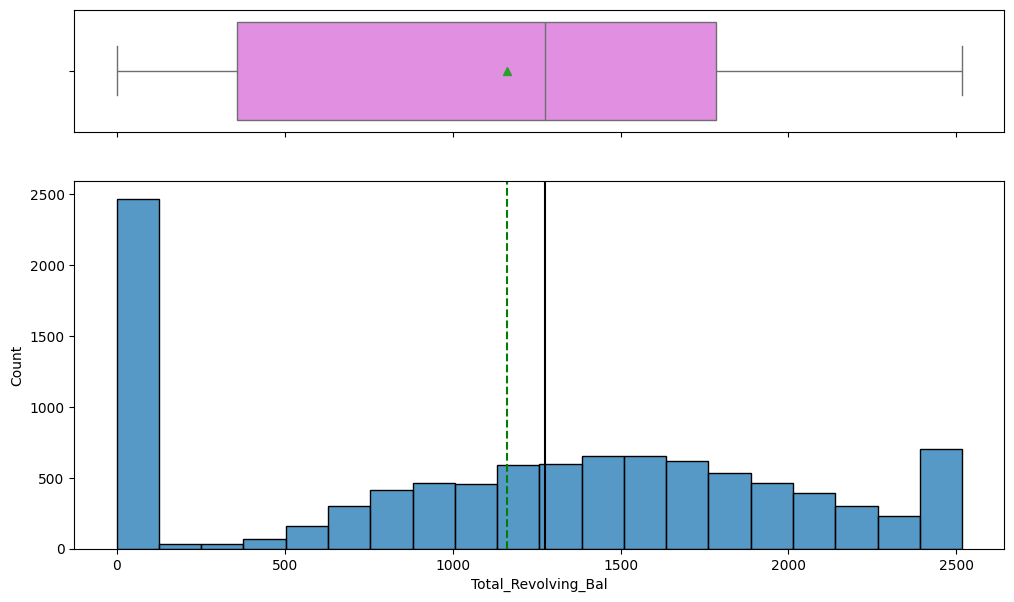

In [33]:
histogram_boxplot(df, 'Total_Revolving_Bal')

* Min `Total_Revolving_bal` is 0, indicating some customers pay off their balance every month.
* Median `Total_Revolving_bal` is around 1250 with the mean being slightly lower.
* The customers with 0 `Total_Revolving_bal` are very slightly left skewing the data.

**Avg_Open_To_Buy**

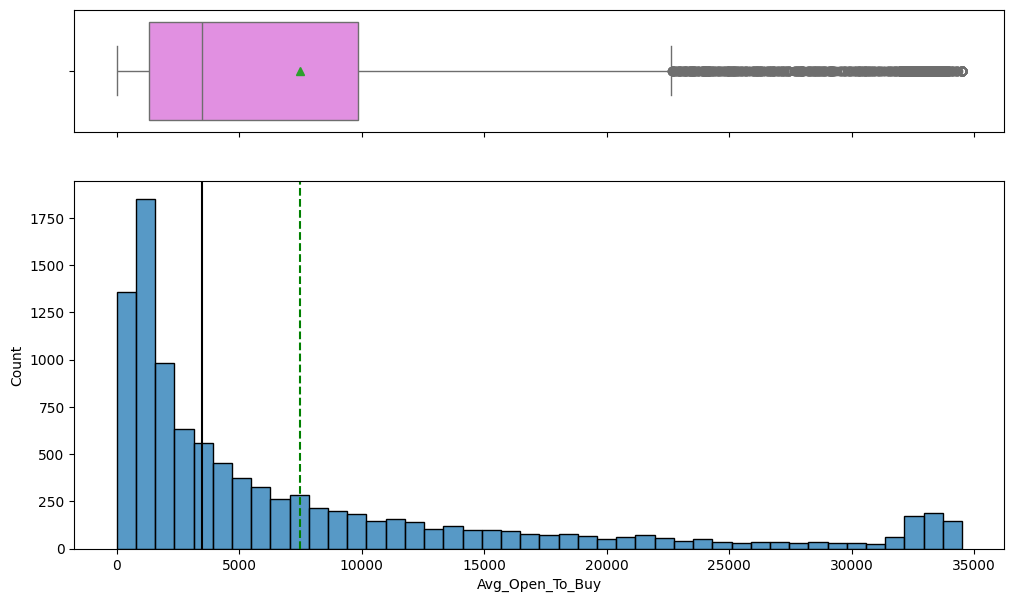

In [34]:
histogram_boxplot(df, 'Avg_Open_To_Buy')

* `Avg_Open_To_Buy` is right skewed as indicated by the mean being so much greater than the median.
* `Avg_Open_To_Buy` has a range of nearly 35,000.
* `Avg_Open_To_Buy` has so many outliers it seems that they cant possibly be all outliers.

**Total_Amt_Chng_Q4_Q1**

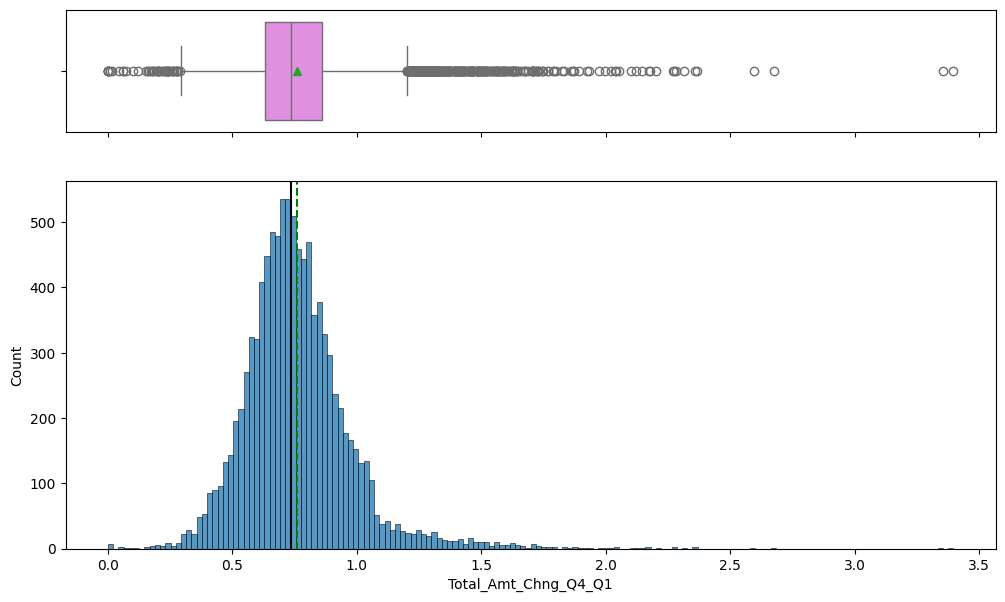

In [35]:
histogram_boxplot(df, 'Total_Amt_Chng_Q4_Q1')

* `Total_Amt_Chng_Q4_Q1` is normally distributed with many outliers and centered around 0.6.
* It is unlikely that this many outliers are actually outliers.

**Total_Trans_Amt**

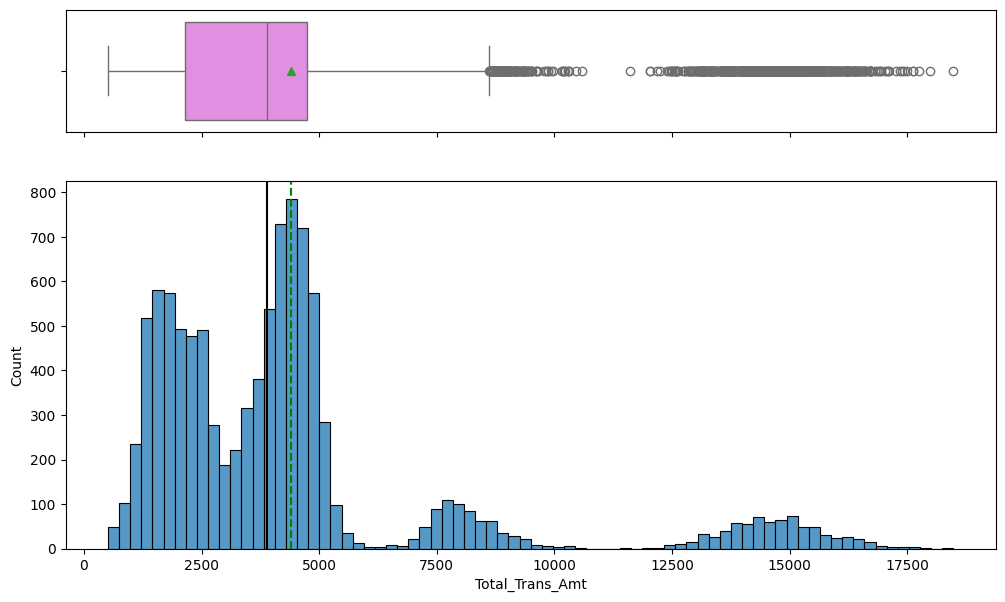

In [36]:
histogram_boxplot(df, 'Total_Trans_Amt')

* `Total_Trans_Amt` is right skewed with many outliers. It has a median of about 4000.
* No customer had a 0 dollar transaction amount, or all customers used their card.

**Total_Trans_Ct**

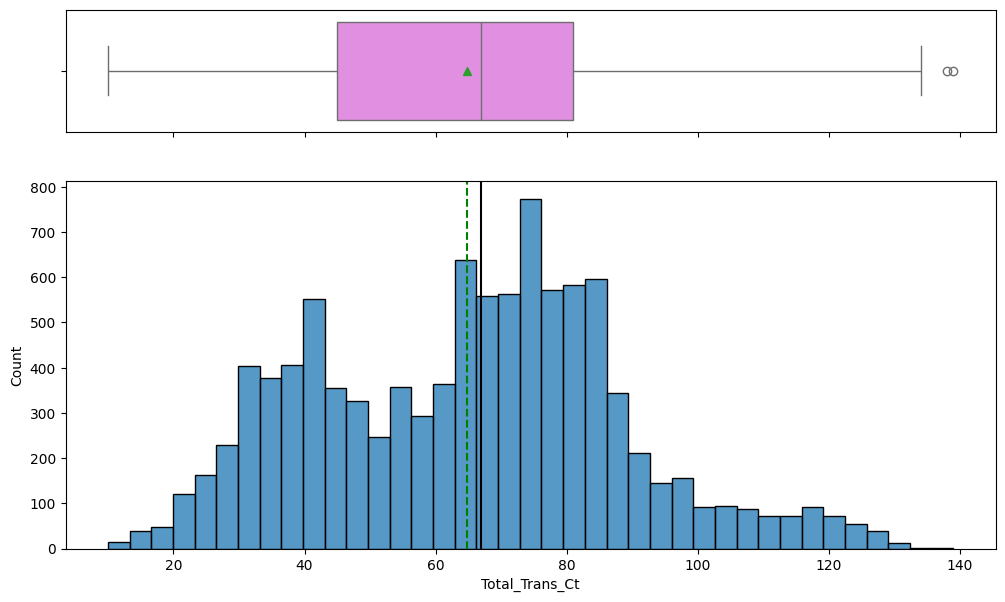

In [37]:
histogram_boxplot(df, 'Total_Trans_Ct')

* `Total_Trans_Ct` is pretty normally distributed with almost a median equal to the mean.
* It does not have many outliers.

**Total_Ct_Chng_Q4_Q1**

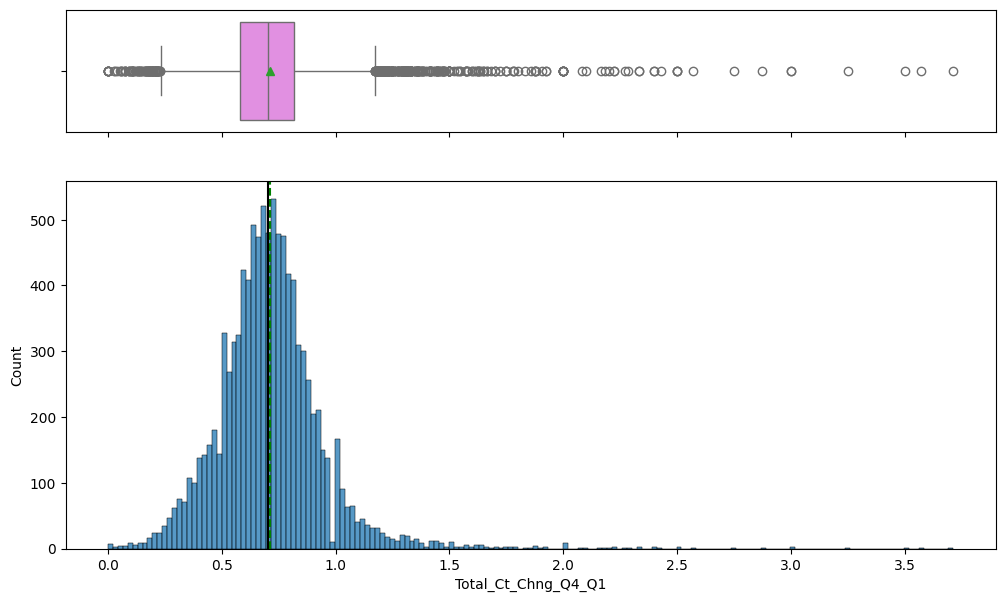

In [38]:
histogram_boxplot(df, 'Total_Ct_Chng_Q4_Q1')

* `Total_Ct_Chng_Q4_Q1` is normally distributed and centered around 0.6.
* The median and mean are almost identical and many outliers are present.

**Avg_Utilization_Ratio**

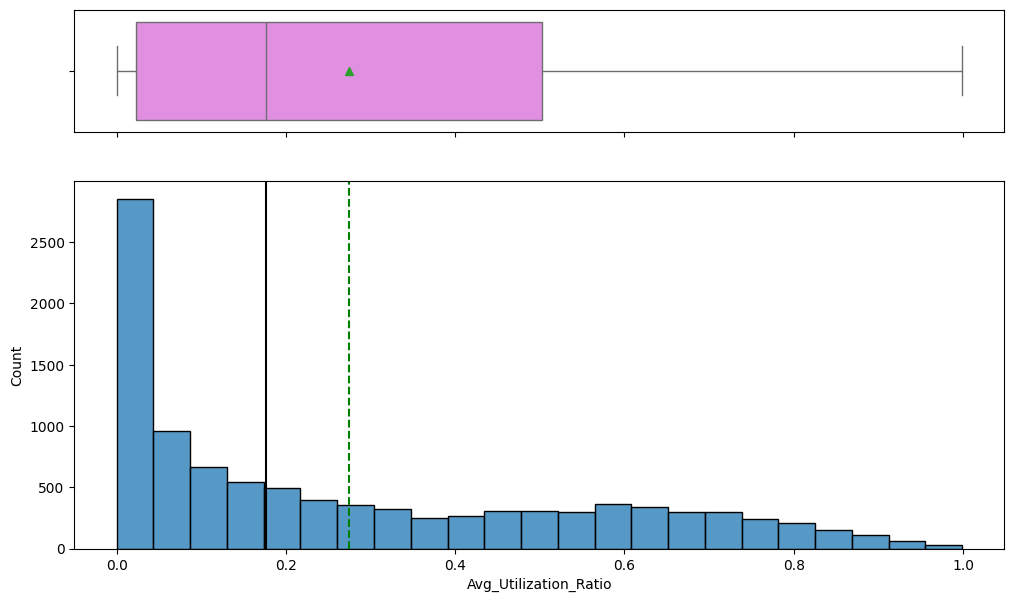

In [39]:
histogram_boxplot(df, 'Avg_Utilization_Ratio')

* `Avg_Utilization_Ratio` is right skewed with no outlier. The range is 1 because this is a utilization ratio from 0 to 100 percent.

**Attrition_Flag**

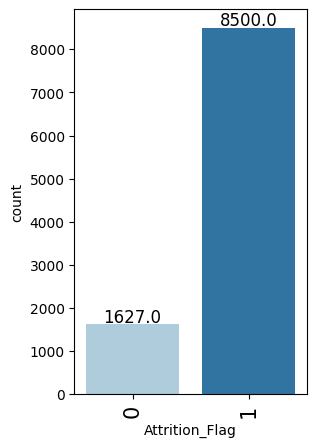

In [40]:
labeled_barplot(df, 'Attrition_Flag')

* 83.9% of all customers are existing customers.
* This is the target variable.

**Gender**

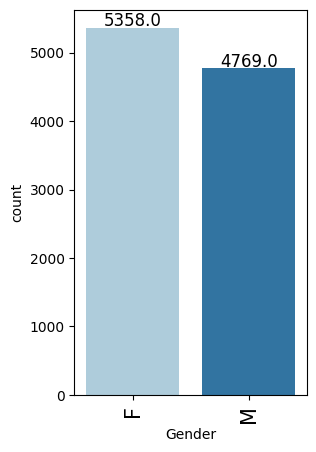

In [41]:
labeled_barplot(df, 'Gender')

* 52.9% of customers are female.

**Dependent_count**

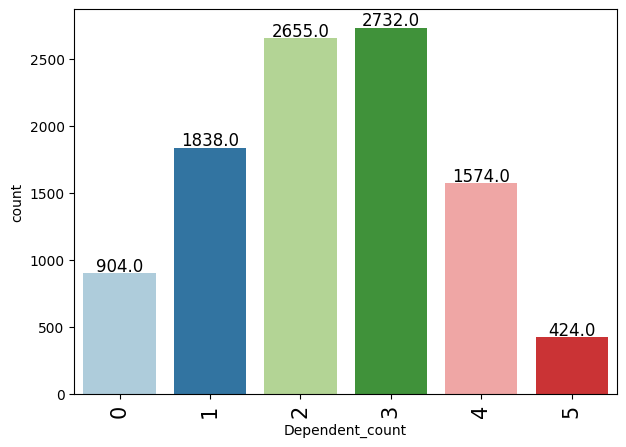

In [42]:
labeled_barplot(df, 'Dependent_count')

In [43]:
# Getting percentages of values
df['Dependent_count'].value_counts(1)

Dependent_count
3   0.270
2   0.262
1   0.181
4   0.155
0   0.089
5   0.042
Name: proportion, dtype: float64

* 26.9% of customers have 3 dependents.
* 26.2% of customers have 2 dependents.
* 18% of customers have 1 dependent.
* 15% of customers have 4 dependents.

**Education_Level**

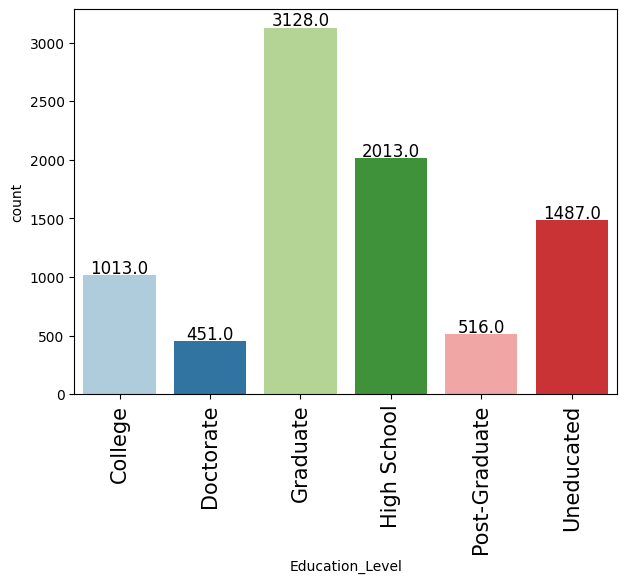

In [44]:
labeled_barplot(df, 'Education_Level')

In [45]:
# Getting percentages of values
df['Education_Level'].value_counts(1)

Education_Level
Graduate        0.363
High School     0.234
Uneducated      0.173
College         0.118
Post-Graduate   0.060
Doctorate       0.052
Name: proportion, dtype: float64

* 36% of customers have a graduate degree.
* 23% of customers have a high school diploma.
* 17% of customers are uneducated.

**Marital_Status**

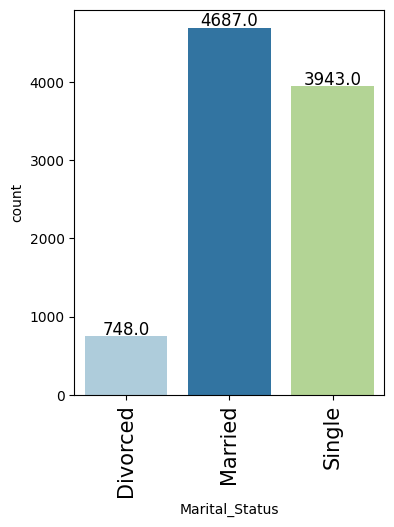

In [46]:
labeled_barplot(df, 'Marital_Status')

In [47]:
# Getting percentages of values
df['Marital_Status'].value_counts(1)

Marital_Status
Married    0.500
Single     0.420
Divorced   0.080
Name: proportion, dtype: float64

* 49% of customers are married.
* 42% of customers are single.
* 7% of customers are divorced.

**Income_Category**

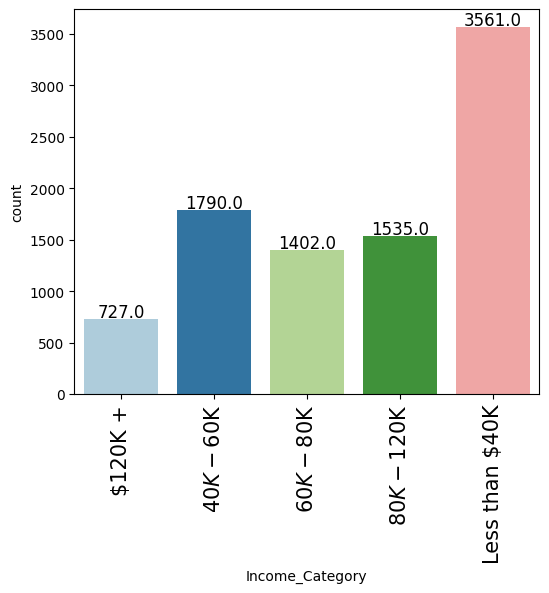

In [48]:
labeled_barplot(df, 'Income_Category')

In [49]:
# Getting percentages of values
df['Income_Category'].value_counts(1)

Income_Category
Less than $40K   0.395
$40K - $60K      0.199
$80K - $120K     0.170
$60K - $80K      0.156
$120K +          0.081
Name: proportion, dtype: float64

* 39% of customers make less than 40k.
* 19% of customers make between 40k - 60k.
* 17% of customers make between 80k - 120k.

**Card_Category**

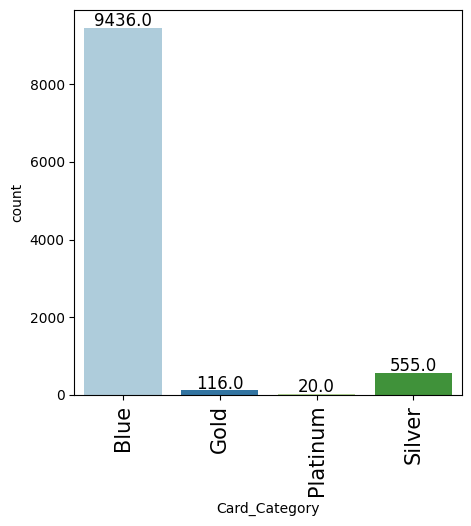

In [50]:
labeled_barplot(df, 'Card_Category')

In [51]:
# Getting percentages of values
df['Card_Category'].value_counts(1)

Card_Category
Blue       0.932
Silver     0.055
Gold       0.011
Platinum   0.002
Name: proportion, dtype: float64

* 93% of customers have a Blue card.
* 5% of customers have a Silver card.

**Total_Relationship_Count**

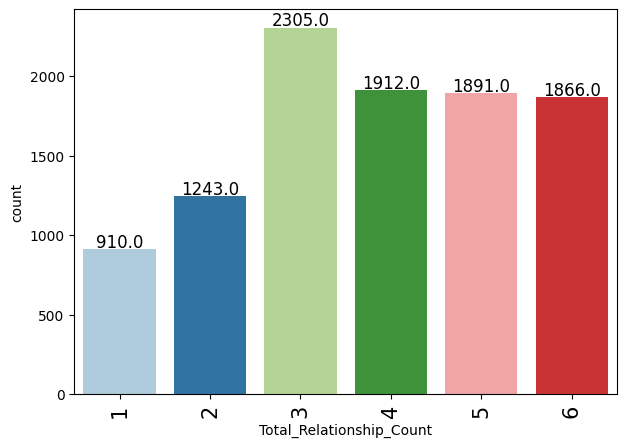

In [52]:
labeled_barplot(df, 'Total_Relationship_Count')

In [53]:
# Getting percentages of values
df['Total_Relationship_Count'].value_counts(1)

Total_Relationship_Count
3   0.228
4   0.189
5   0.187
6   0.184
2   0.123
1   0.090
Name: proportion, dtype: float64

* 22.8% of customers have 3 products.
* 18.9% of customers have 4 products.
* 18.7% of customers have 5 products.
* 18.4% of customers have 6 products.

**Months_Inactive_12_mon**

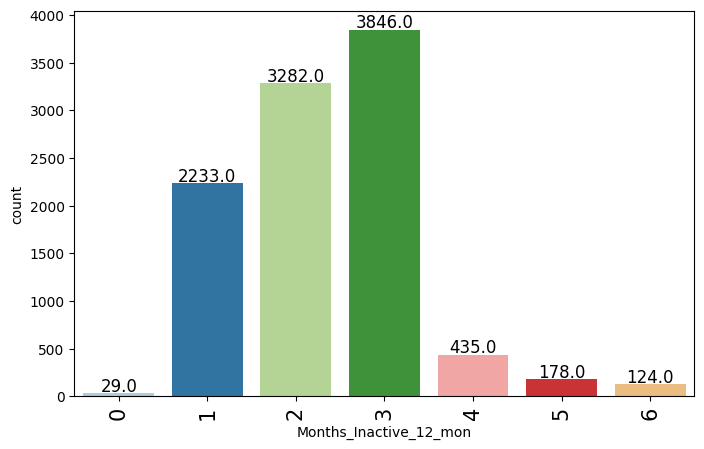

In [54]:
labeled_barplot(df, 'Months_Inactive_12_mon')

**Months_Inactive_12_mon**

In [55]:
# Getting percentages of values
df['Months_Inactive_12_mon'].value_counts(1)

Months_Inactive_12_mon
3   0.380
2   0.324
1   0.220
4   0.043
5   0.018
6   0.012
0   0.003
Name: proportion, dtype: float64

* 38% of customers have 3 months inactive.
* 32% of customers have 2 months inactive.
* 22% of customers have 1 months inactive.

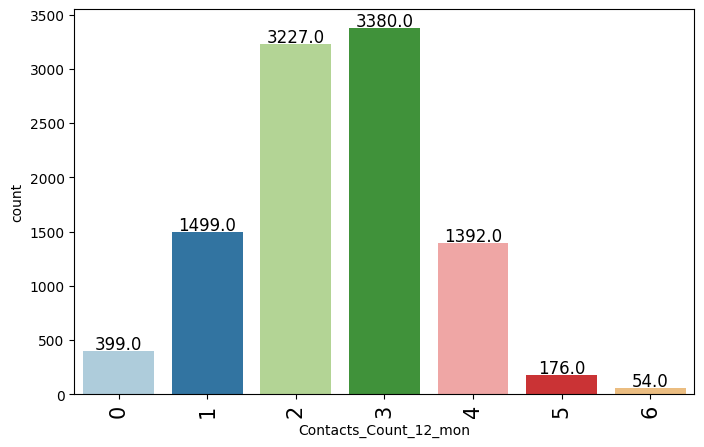

In [56]:
labeled_barplot(df, 'Contacts_Count_12_mon')

In [57]:
# Getting percentages of values
df['Contacts_Count_12_mon'].value_counts(1)

Contacts_Count_12_mon
3   0.334
2   0.319
1   0.148
4   0.137
0   0.039
5   0.017
6   0.005
Name: proportion, dtype: float64

* 33% of customers have been contacted 3 times in the last 12 months.
* 31% of customers have been contacted 2 times in the last 12 months.
* 14% of customers have been contacted 1 times in the last 12 months.

### Bivariate Analysis

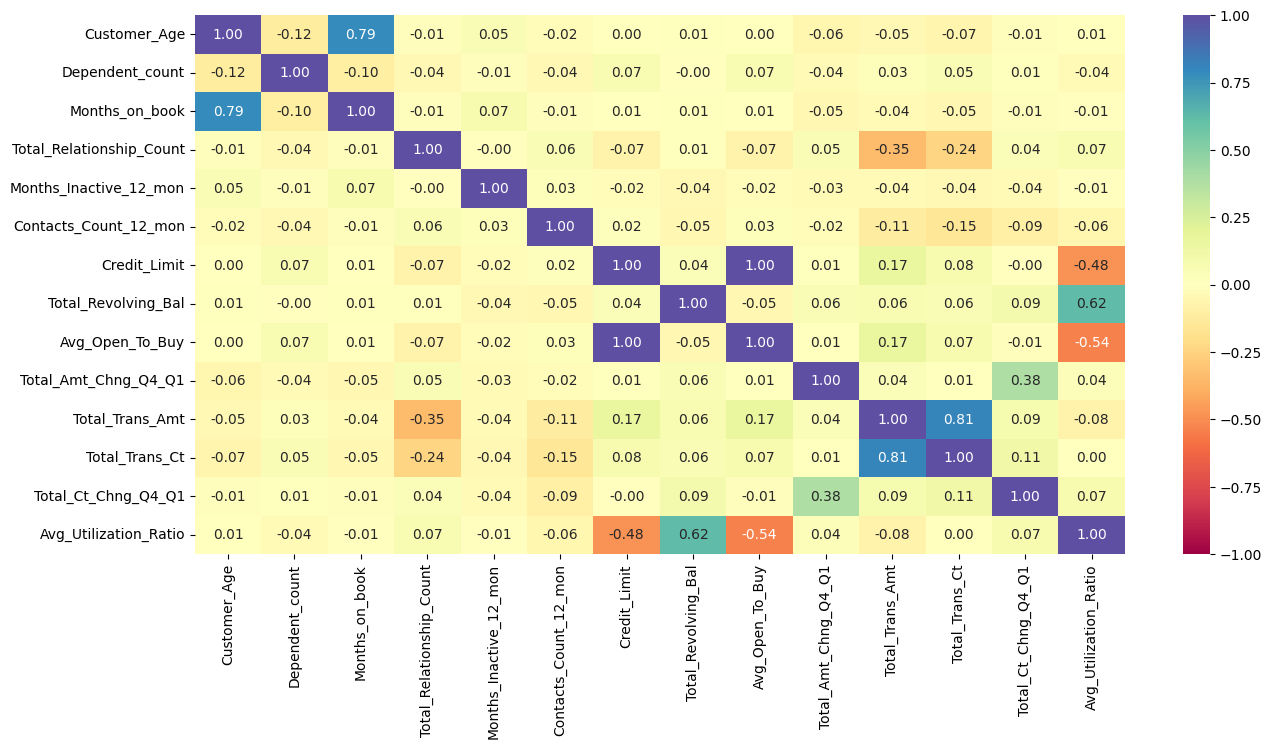

In [58]:
# Correlation Check: Let's see the attributes that have a strong correlation with each other
plt.figure(figsize=(15, 7))
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()
sns.heatmap(df[numeric_columns].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* Avg_Open_to_Buy and Credit_Limit are positively correlated due to necessity. As a customer's credit limit increases, their available credit (open to buy) also increases.
* Total_Trans_Amt and Total_Trans_Ct are highly positively correlated. This correlation is logical because as the number of transactions increases, the total transaction amount tends to increase as well.
* Customer_Age and Months_on_book are positively correlated. This correlation is expected because as customers age, their duration of association with the bank (months on book) typically increases.
* Total_Revolving_Bal and Avg_Utilization_Ratio are positively correlated. This correlation is reasonable because customers with higher credit utilization ratios tend to have higher revolving balances.
* Avg_Open_To_Buy and Avg_Utilization_Ratio are negatively correlated. This is because higher credit utilization results in lower available credit (open to buy).
* Credit_Limit and Avg_Utilization_Ratio are negatively correlated. This correlation arises because customers with higher credit limits tend to have lower utilization rates.

**Attrition_Flag vs Total_Trans_Amt**

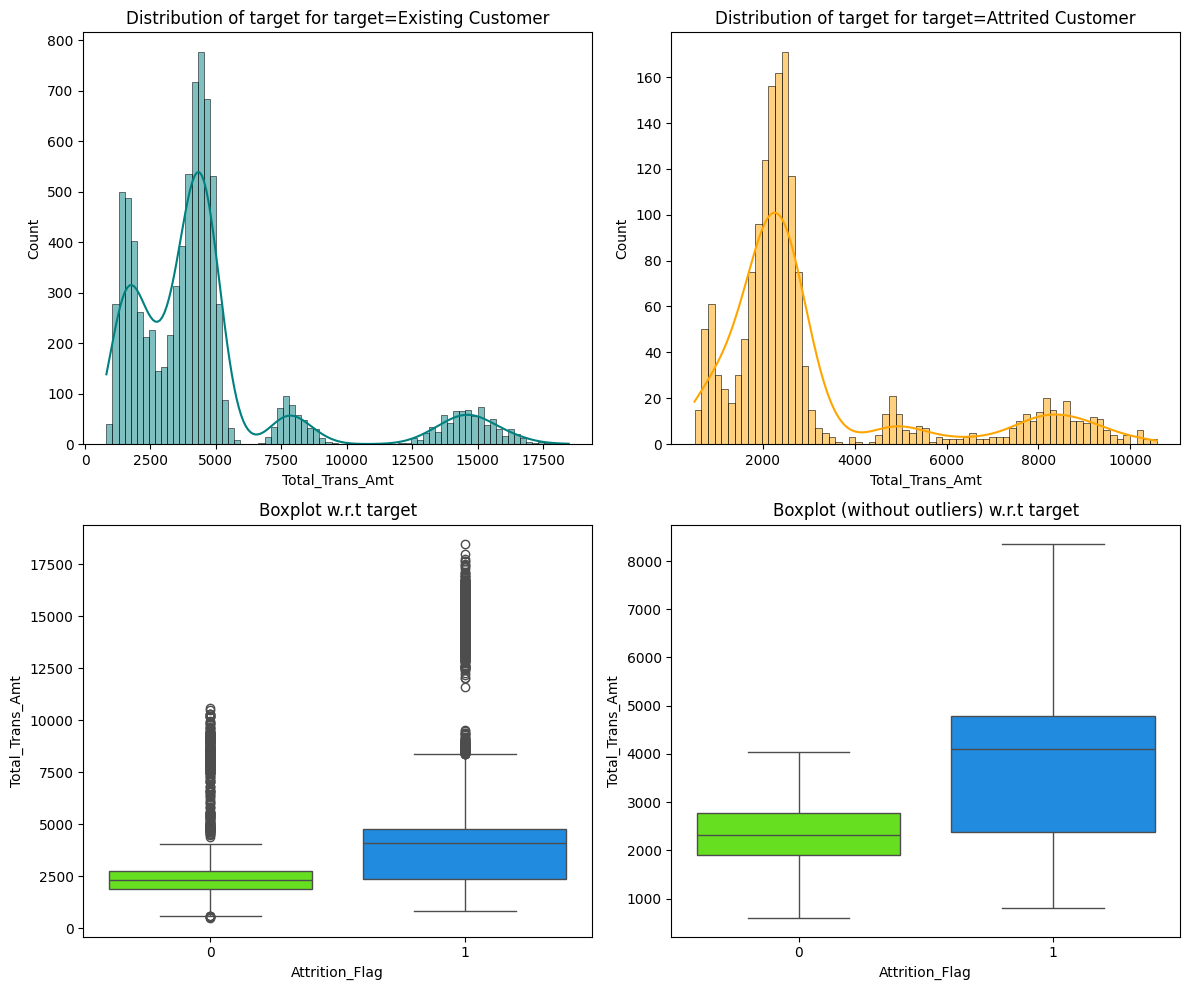

In [59]:
distribution_plot_wrt_target(df, "Total_Trans_Amt", "Attrition_Flag")

* The distribution of `Total_Trans_Amt` looks similar for both existing and attrited customers.
* The median `Total_Trans_Amt` for attrited customers is 2500, while the median for existing customers is closer to 4000.
* The IQR of `Total_Trans_Amt` for attrited customers is much smaller than that of existing customers.
* The maximum `Total_Trans_Amt` for attrited customers is about half as much compared to exsiting customers.

**Attrition_Flag vs Total_Trans_Ct**

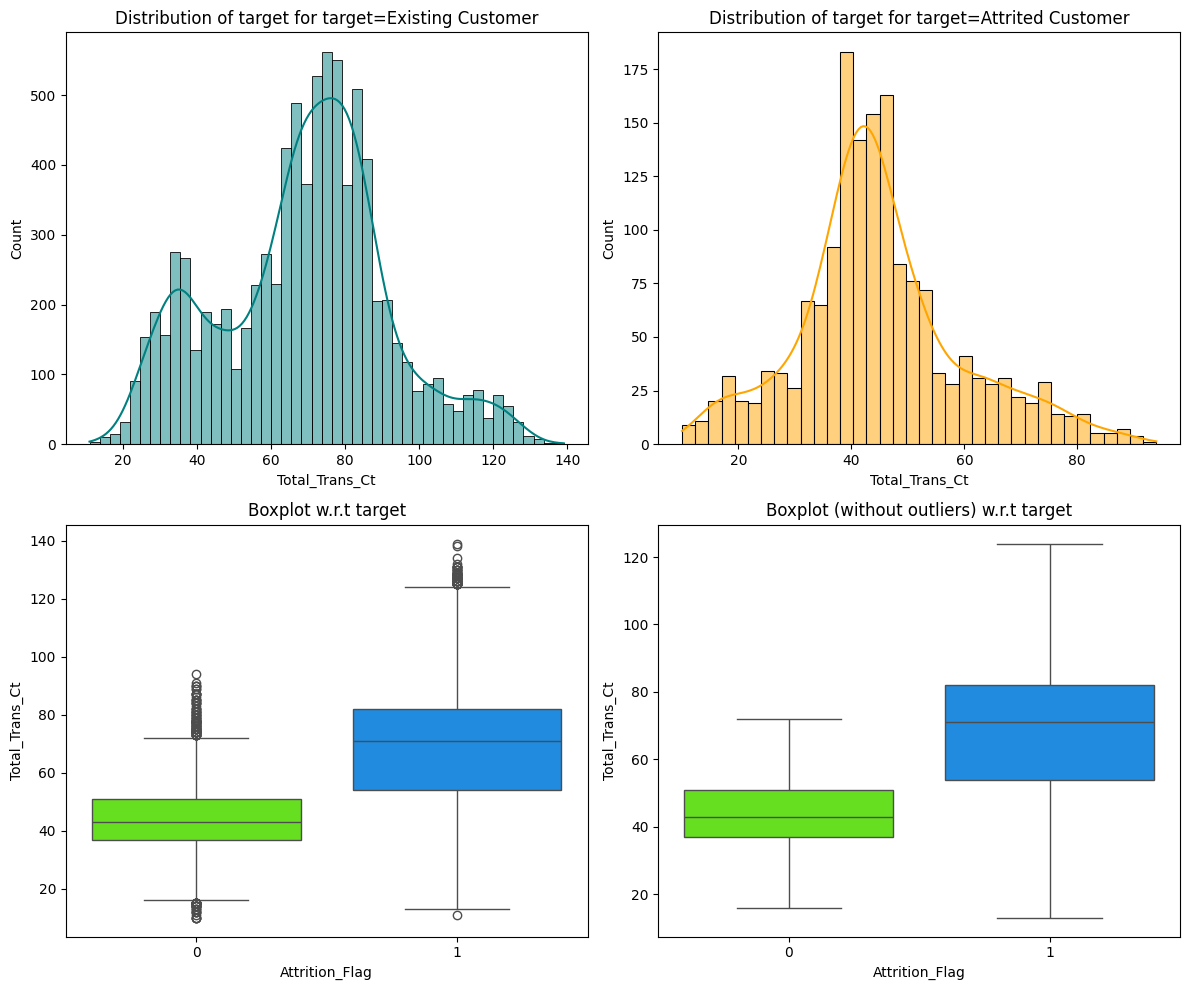

In [60]:
distribution_plot_wrt_target(df, "Total_Trans_Ct", "Attrition_Flag")

* The distribution of `Total_Trans_Ct` is more normally distributed for attrited customers
* The distribution of `Total_Trans_Ct` for attrited customers is centered around 50 while for existing customers the center is around 70.
* Attrited customers have a much lower median and max `Total_Trans_Ct` than existing customers.

**Attrition_Flag vs Total_Revolving_Bal**

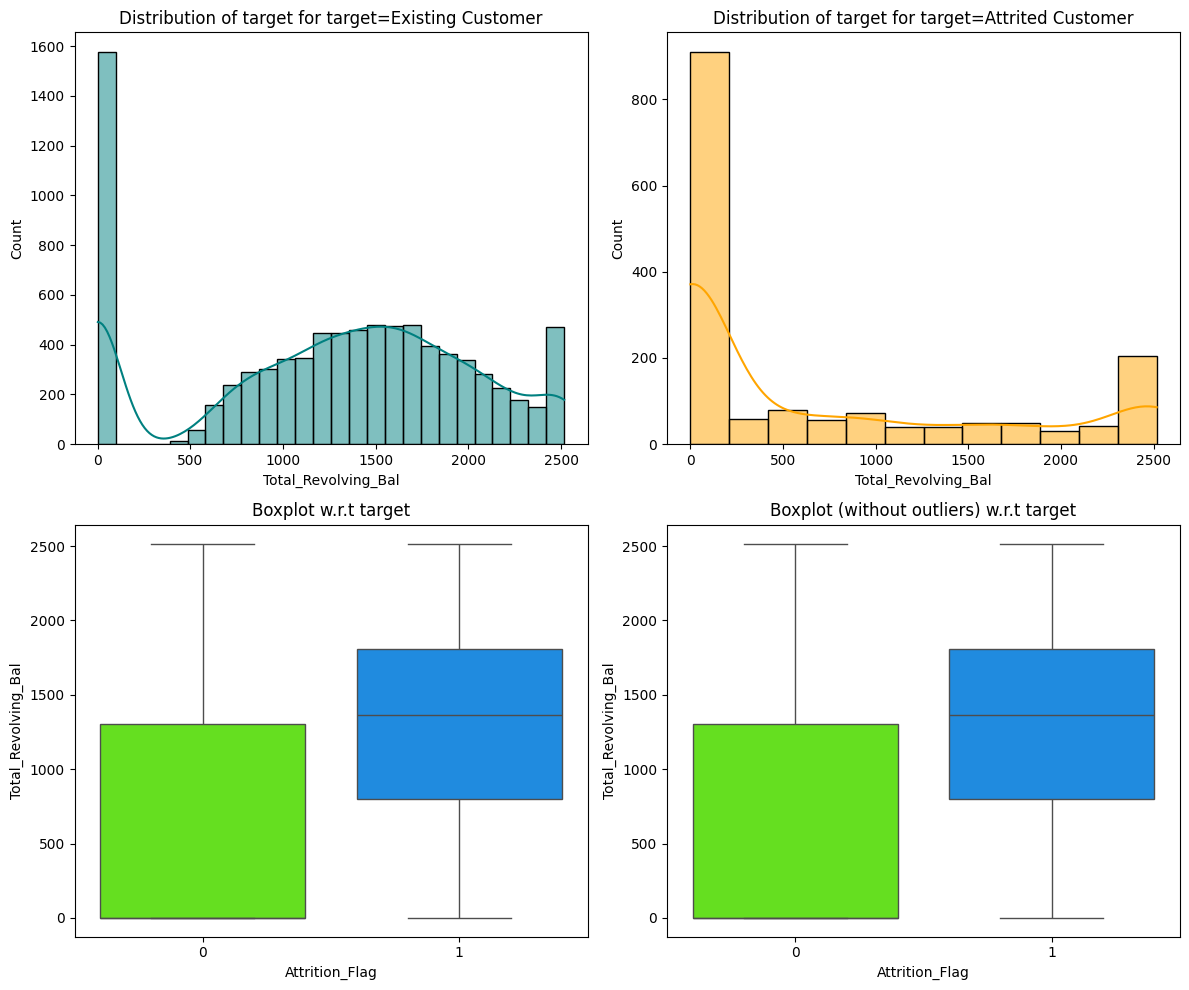

In [61]:
distribution_plot_wrt_target(df, "Total_Revolving_Bal", "Attrition_Flag")

* `Total_Revolving_Bal` has similar distributions for both attrited and existing customers, but the existing customers have a bulge in the center.
* Attrited customers have peaks at both the min and max of the distribution.
* The median `Total_Revolving_Bal` for existing customers is higher than that of more than 75% of attrited customers.

**Attrition_Flag vs Total_Ct_Chng_Q4_Q1**

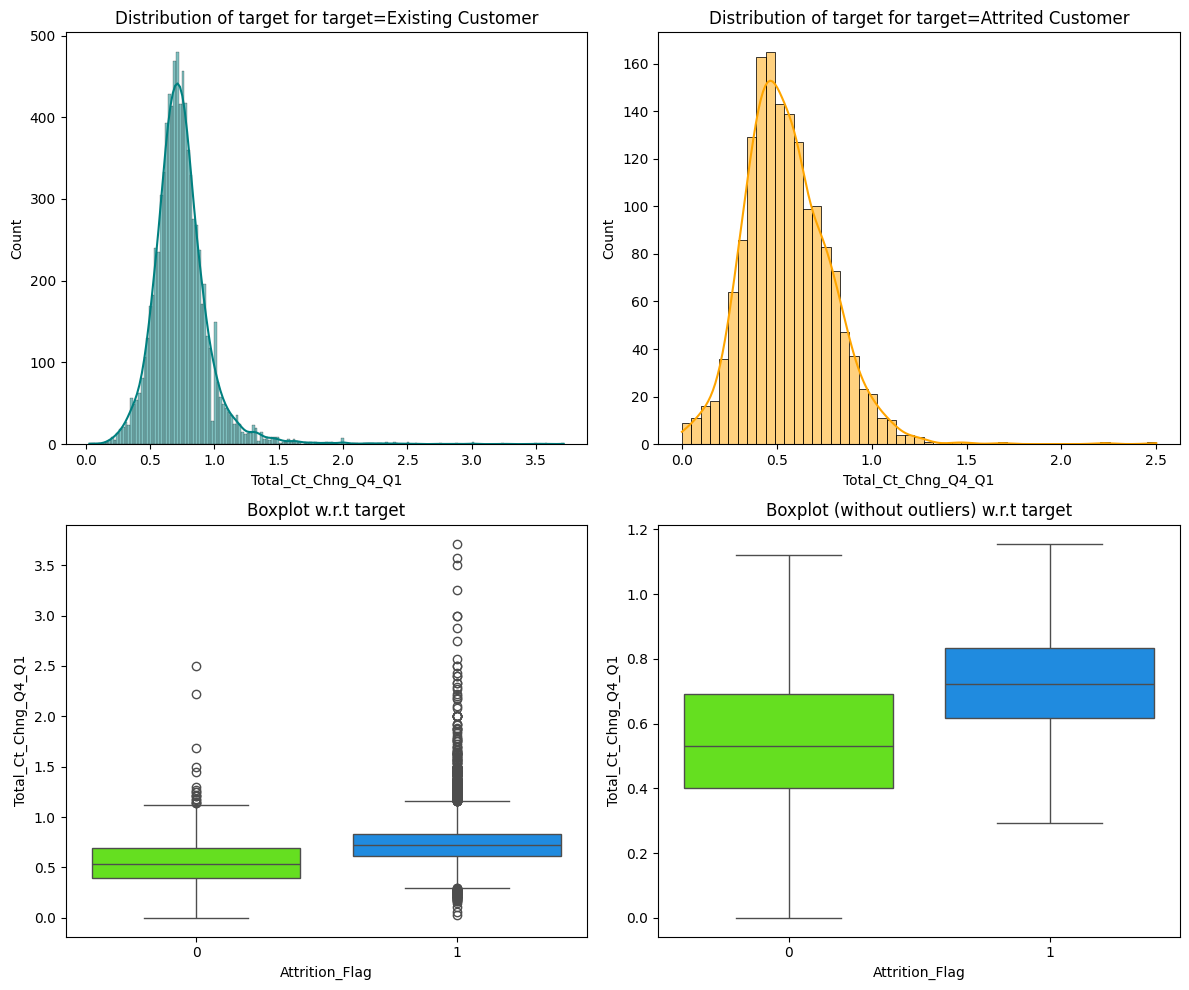

In [62]:
distribution_plot_wrt_target(df, "Total_Ct_Chng_Q4_Q1", "Attrition_Flag")

* Distributions of `Total_Ct_Chng_Q4_Q1` for both attrited and existing customers are normally distributed.
* Distribution of `Total_Ct_Chng_Q4_Q1` is centered around 0.5 for attrited customers.
* Distribution of `Total_Ct_Chng_Q4_Q1` is centered around 0.7 for existing customers.
* Median of `Total_Ct_Chng_Q4_Q1` for existing customers is greater than that of 75% of attrited customers.
* Max of `Total_Ct_Chng_Q4_Q1` for existing customers similar to attrited customers.
* Min of `Total_Ct_Chng_Q4_Q1` for existing customer much greater than that of attrited customers.

**Attrition_Flag vs Total_Amt_Chng_Q4_Q1**

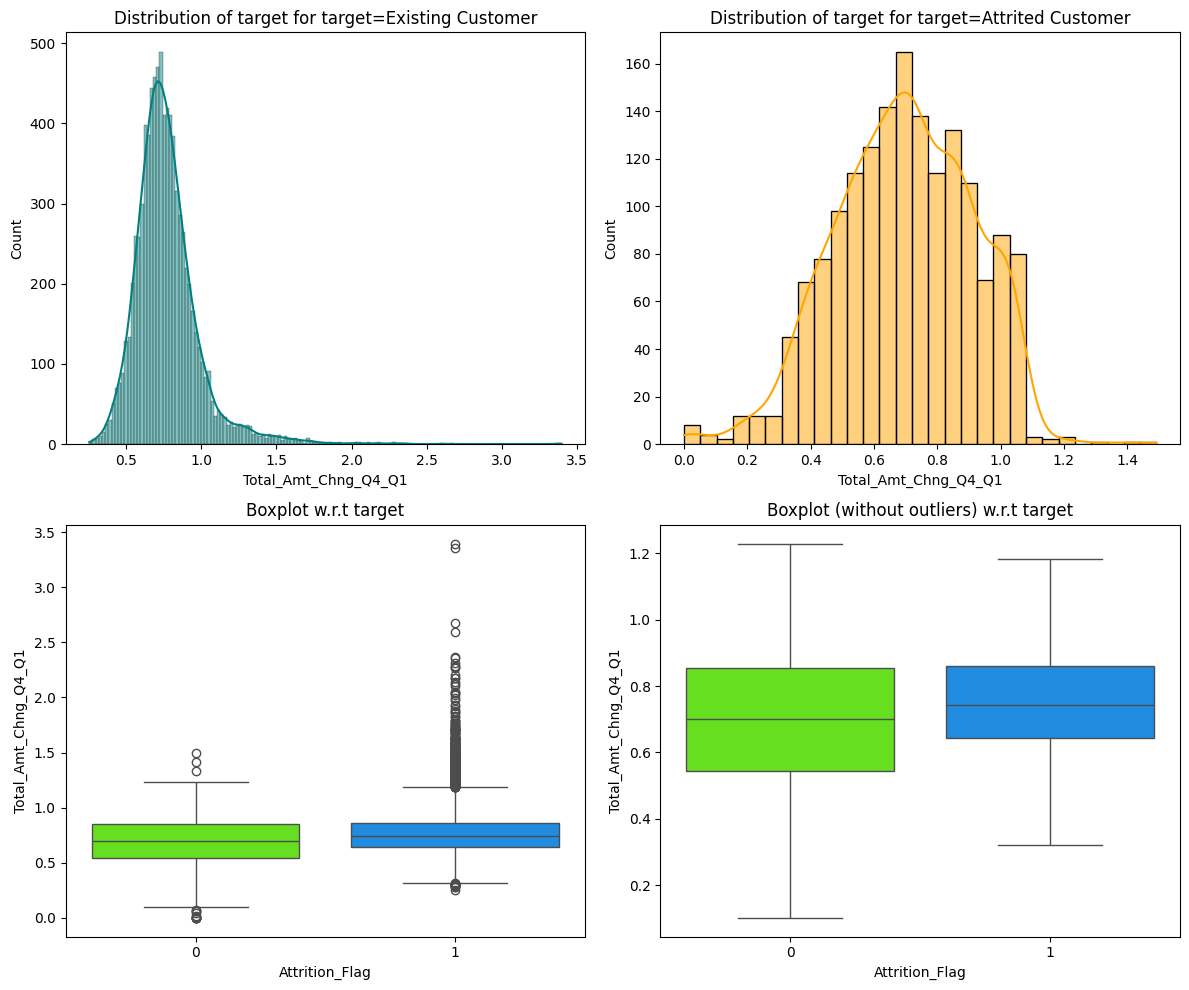

In [63]:
distribution_plot_wrt_target(df, "Total_Amt_Chng_Q4_Q1", "Attrition_Flag")

* `Total_Amt_Chng_Q4_Q1` has similar distributions for both attrited customers.
* Median is higher for existing customers.
* Min is much lower for attrited customers.

**Attrition_Flag vs Gender**

Attrition_Flag  Attrited Customer  Existing Customer    All
Gender                                                     
All                          1627               8500  10127
F                             930               4428   5358
M                             697               4072   4769
------------------------------------------------------------------------------------------------------------------------


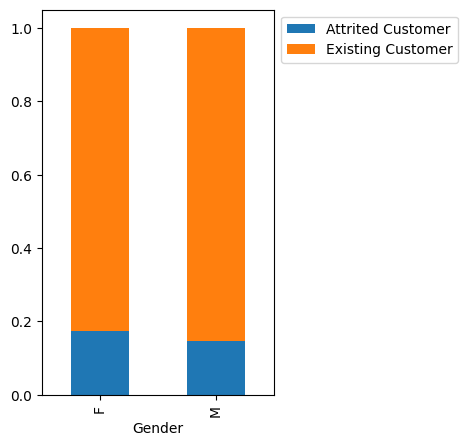

In [64]:
stacked_barplot(data, "Gender", "Attrition_Flag")

**Attrition_Flag vs Marital_Status**

Attrition_Flag  Attrited Customer  Existing Customer   All
Marital_Status                                            
All                          1498               7880  9378
Married                       709               3978  4687
Single                        668               3275  3943
Divorced                      121                627   748
------------------------------------------------------------------------------------------------------------------------


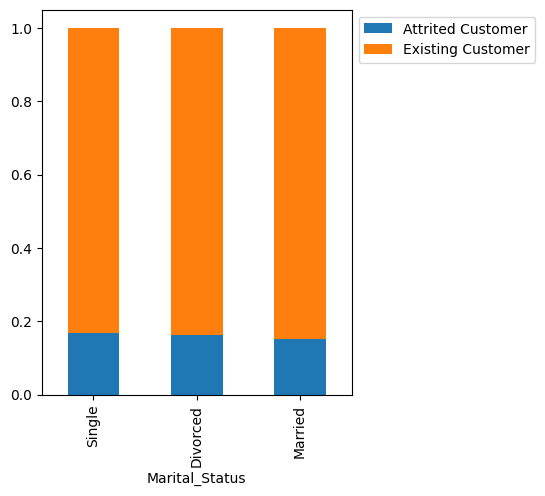

In [65]:
stacked_barplot(data,"Marital_Status", "Attrition_Flag")

**Attrition_Flag vs Education_Level**

Attrition_Flag   Attrited Customer  Existing Customer   All
Education_Level                                            
All                           1371               7237  8608
Graduate                       487               2641  3128
High School                    306               1707  2013
Uneducated                     237               1250  1487
College                        154                859  1013
Doctorate                       95                356   451
Post-Graduate                   92                424   516
------------------------------------------------------------------------------------------------------------------------


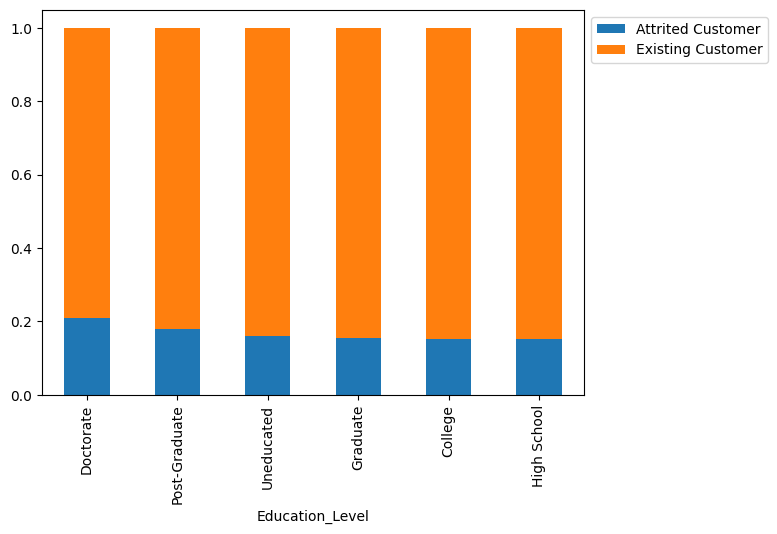

In [66]:
stacked_barplot(data,"Education_Level", "Attrition_Flag")

**Attrition_Flag vs Income_Category**

Attrition_Flag   Attrited Customer  Existing Customer    All
Income_Category                                             
All                           1627               8500  10127
Less than $40K                 612               2949   3561
$40K - $60K                    271               1519   1790
$80K - $120K                   242               1293   1535
$60K - $80K                    189               1213   1402
abc                            187                925   1112
$120K +                        126                601    727
------------------------------------------------------------------------------------------------------------------------


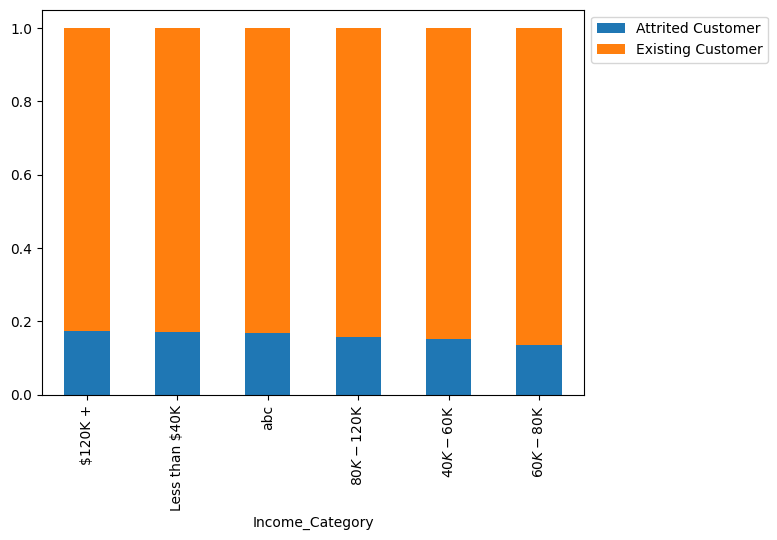

In [67]:
stacked_barplot(data,"Income_Category", "Attrition_Flag")

**Attrition_Flag vs Contacts_Count_12_mon**

Attrition_Flag         Attrited Customer  Existing Customer    All
Contacts_Count_12_mon                                             
All                                 1627               8500  10127
3                                    681               2699   3380
2                                    403               2824   3227
4                                    315               1077   1392
1                                    108               1391   1499
5                                     59                117    176
6                                     54                  0     54
0                                      7                392    399
------------------------------------------------------------------------------------------------------------------------


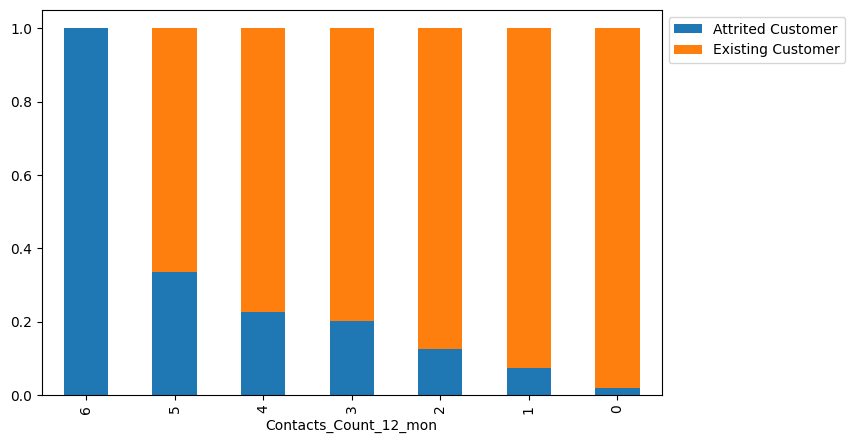

In [68]:
stacked_barplot(data,"Contacts_Count_12_mon", "Attrition_Flag")

**Attrition_Flag vs Months_Inactive_12_mon**

Attrition_Flag          Attrited Customer  Existing Customer    All
Months_Inactive_12_mon                                             
All                                  1627               8500  10127
3                                     826               3020   3846
2                                     505               2777   3282
4                                     130                305    435
1                                     100               2133   2233
5                                      32                146    178
6                                      19                105    124
0                                      15                 14     29
------------------------------------------------------------------------------------------------------------------------


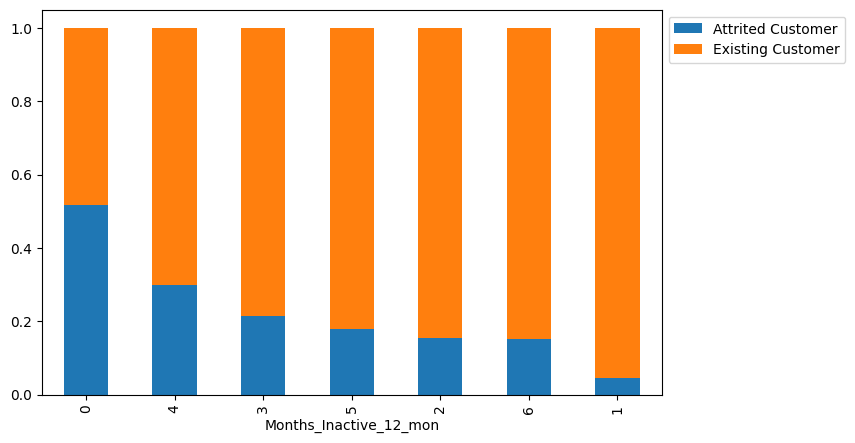

In [69]:
stacked_barplot(data,"Months_Inactive_12_mon", "Attrition_Flag")

**Attrition_Flag vs Total_Relationship_Count**

Attrition_Flag            Attrited Customer  Existing Customer    All
Total_Relationship_Count                                             
All                                    1627               8500  10127
3                                       400               1905   2305
2                                       346                897   1243
1                                       233                677    910
5                                       227               1664   1891
4                                       225               1687   1912
6                                       196               1670   1866
------------------------------------------------------------------------------------------------------------------------


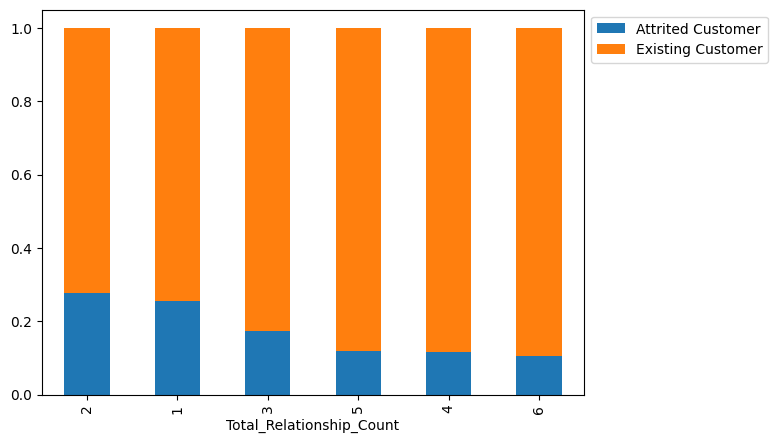

In [70]:
stacked_barplot(data,"Total_Relationship_Count", "Attrition_Flag")

**Attrition_Flag vs Dependent_count**

Attrition_Flag   Attrited Customer  Existing Customer    All
Dependent_count                                             
All                           1627               8500  10127
3                              482               2250   2732
2                              417               2238   2655
1                              269               1569   1838
4                              260               1314   1574
0                              135                769    904
5                               64                360    424
------------------------------------------------------------------------------------------------------------------------


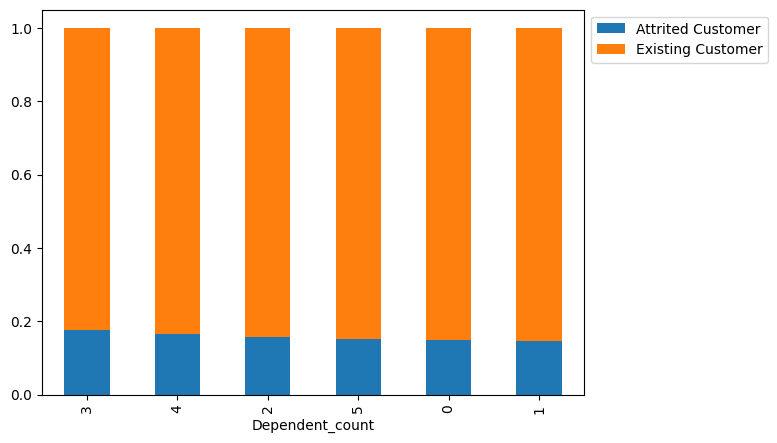

In [71]:
stacked_barplot(data,"Dependent_count", "Attrition_Flag")

**Total_Revolving_Bal vs Attrition_Flag**

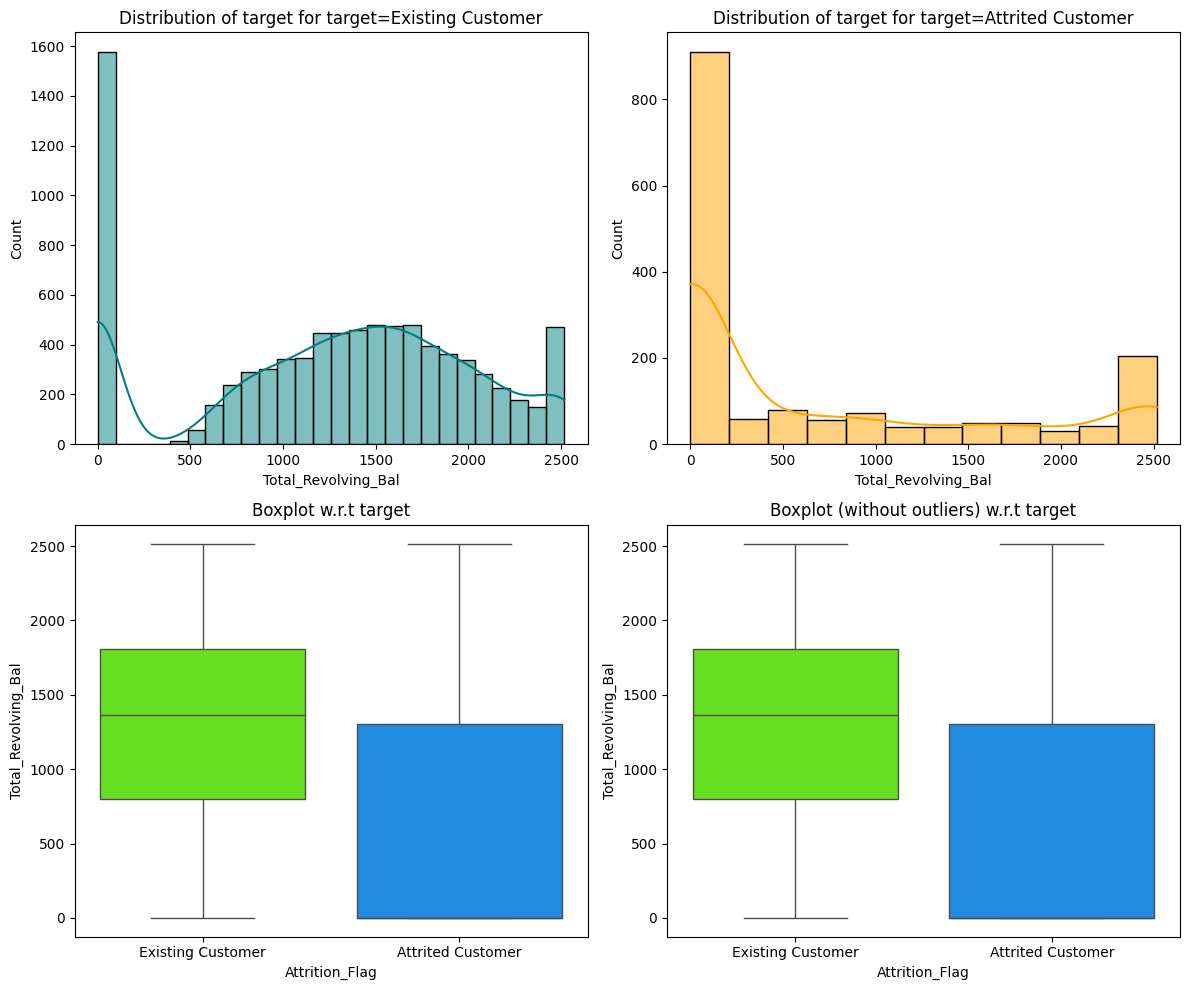

In [72]:
distribution_plot_wrt_target(data, "Total_Revolving_Bal", "Attrition_Flag")

**Attrition_Flag vs Credit_Limit**

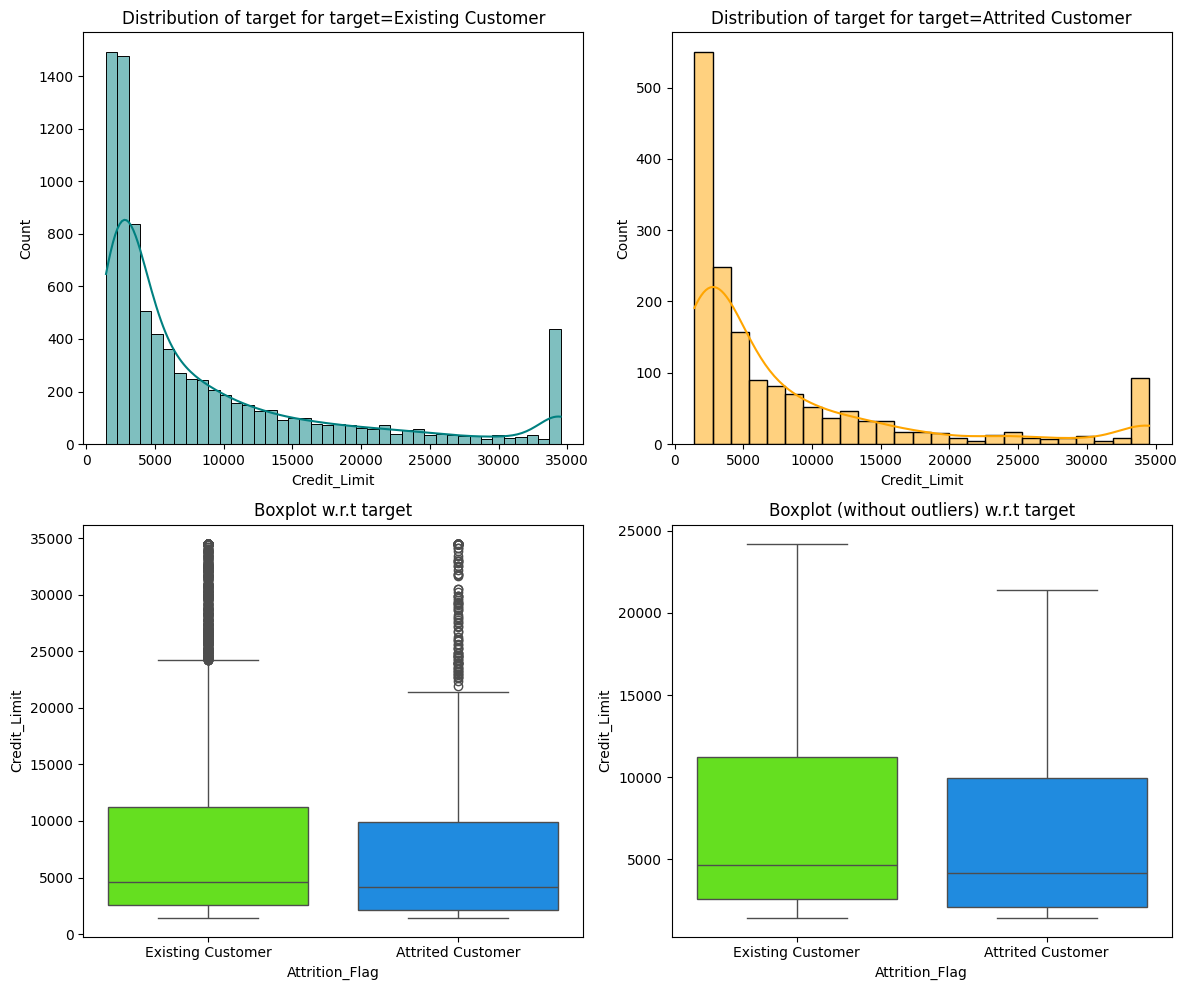

In [73]:
distribution_plot_wrt_target(data, "Credit_Limit", "Attrition_Flag")

**Attrition_Flag vs Customer_Age**

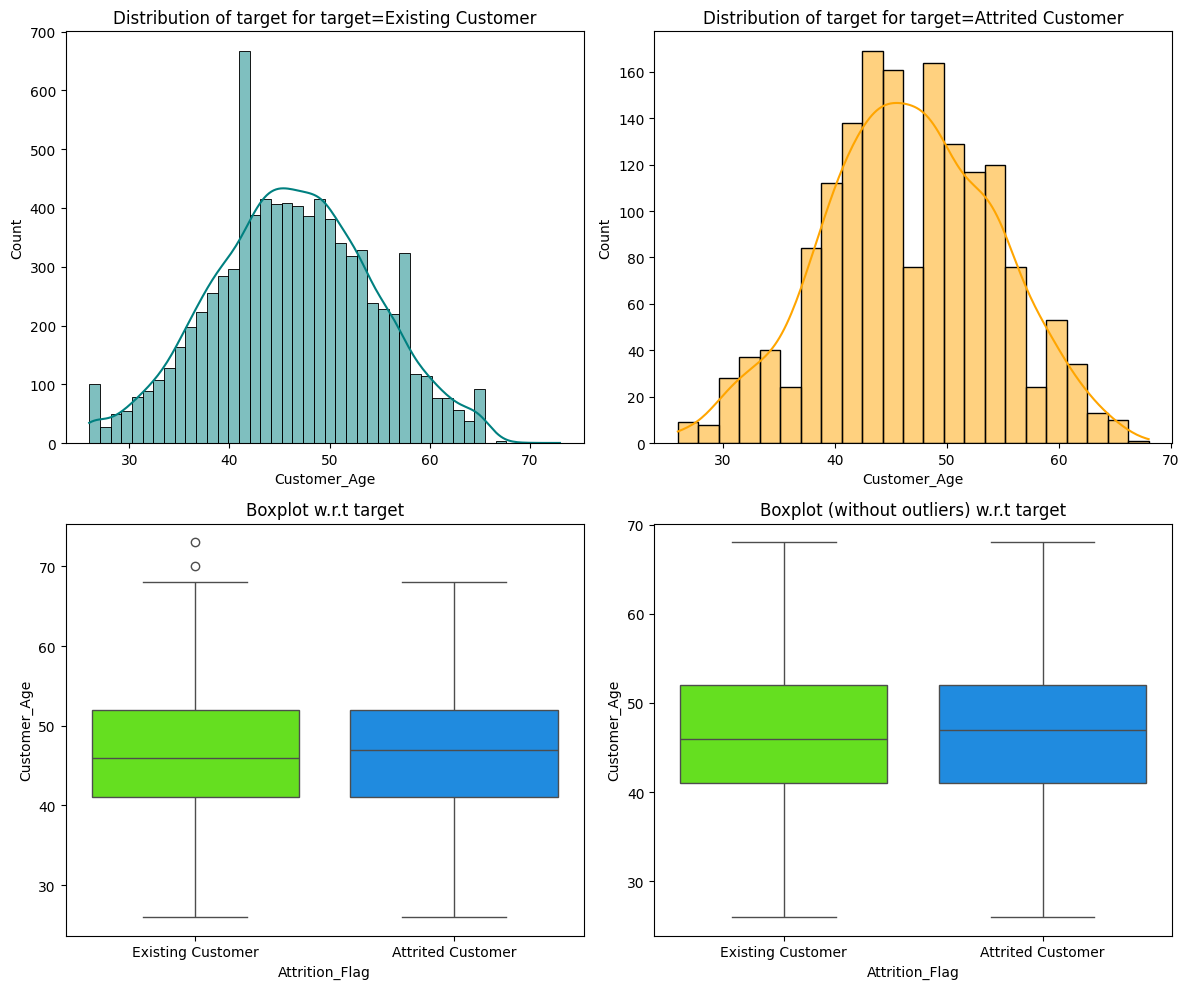

In [74]:
distribution_plot_wrt_target(data, "Customer_Age", "Attrition_Flag")

**Avg_Utilization_Ratio vs Attrition_Flag**

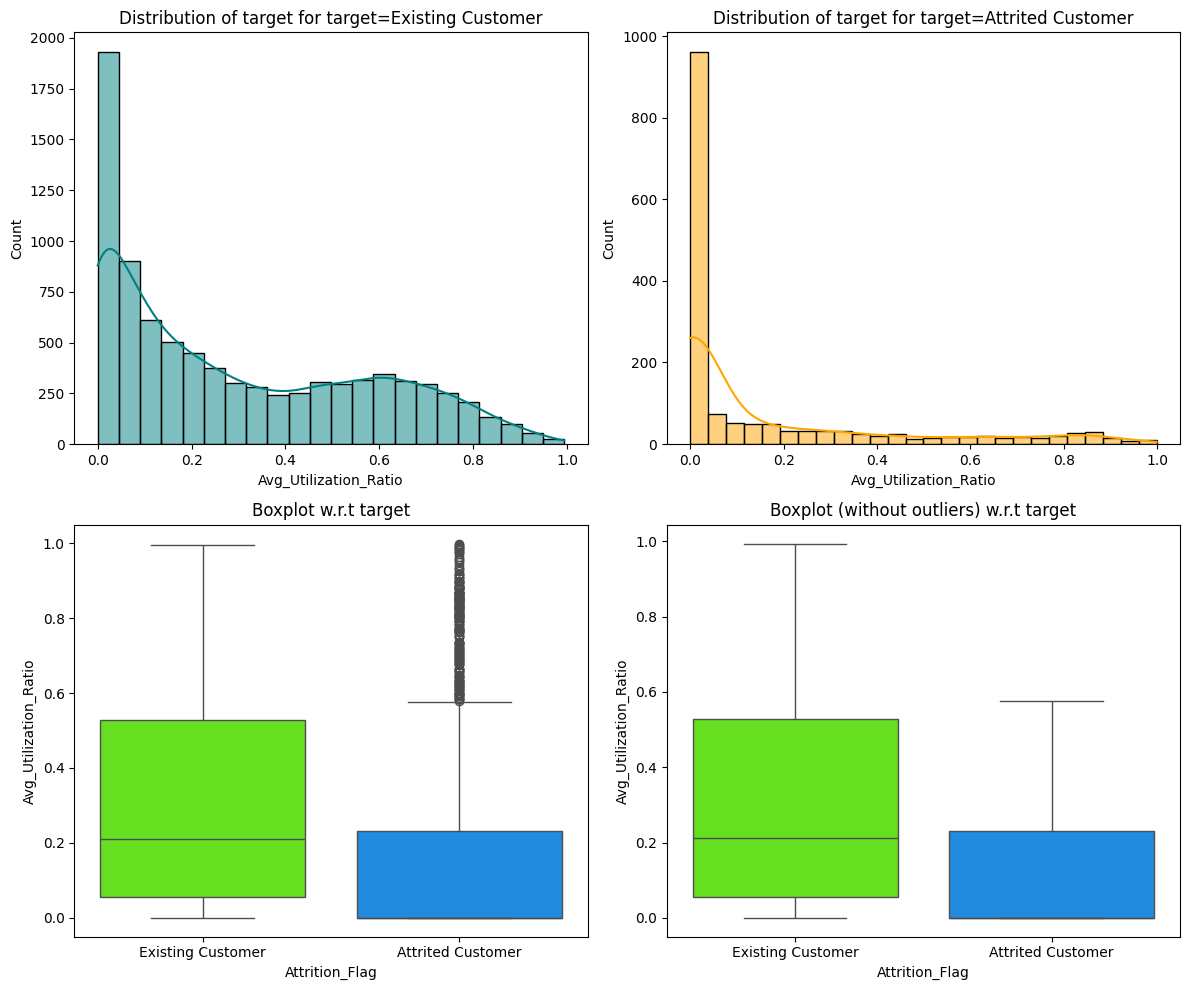

In [75]:
distribution_plot_wrt_target(data, "Avg_Utilization_Ratio", "Attrition_Flag")

**Attrition_Flag vs Months_on_book**

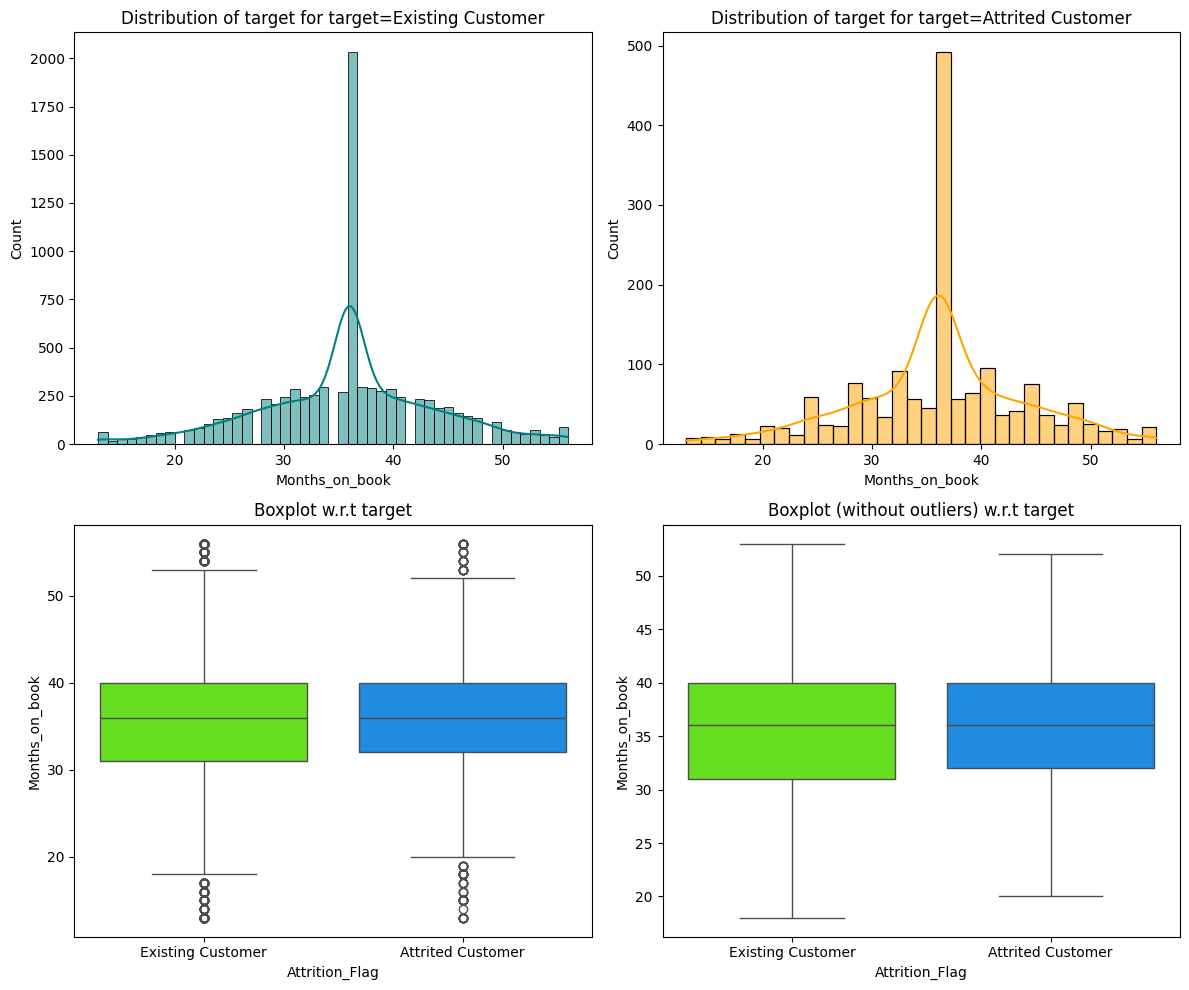

In [76]:
distribution_plot_wrt_target(data, "Months_on_book", "Attrition_Flag")

**Attrition_Flag vs Avg_Open_To_Buy**

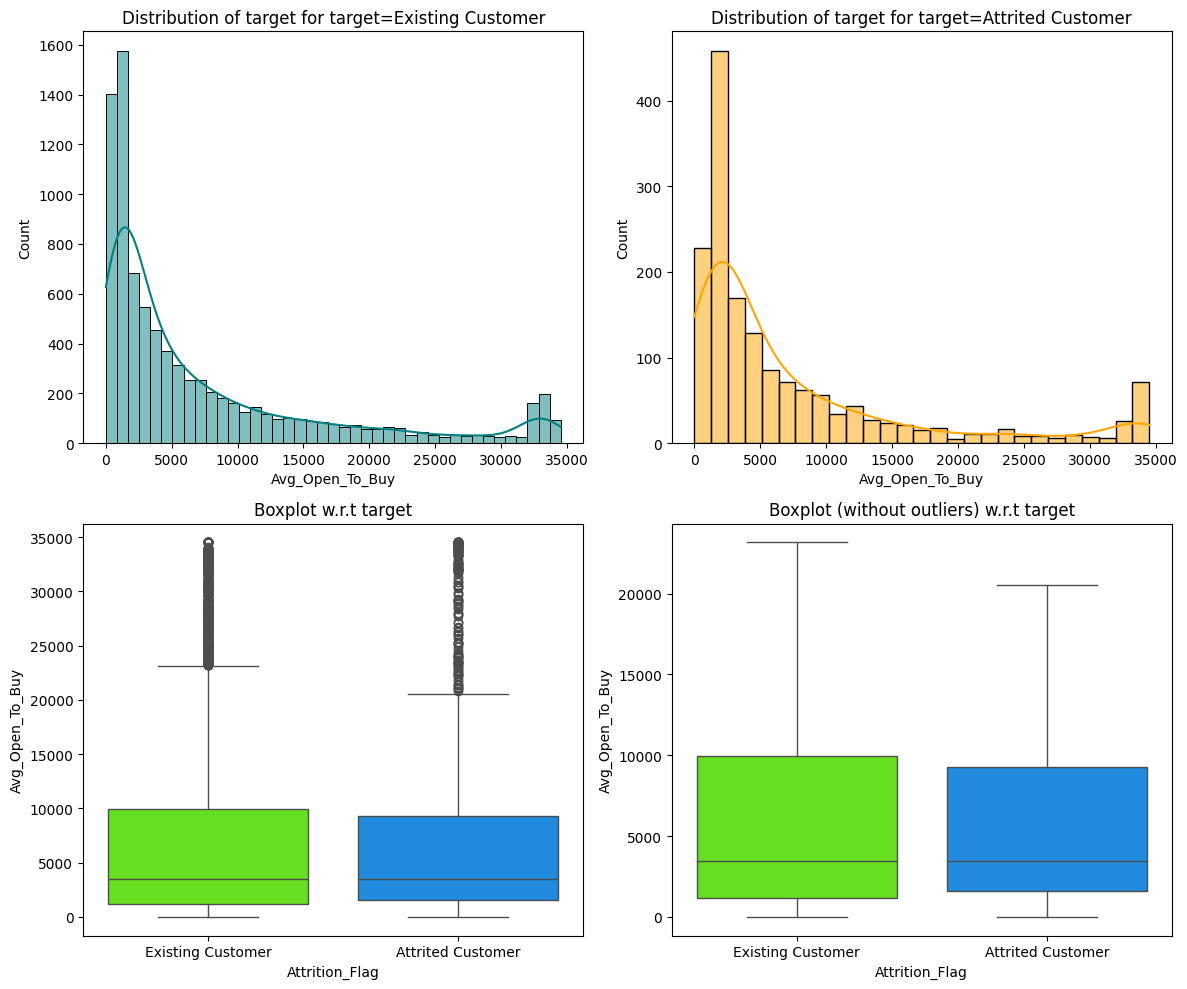

In [77]:
distribution_plot_wrt_target(data, "Avg_Open_To_Buy", "Attrition_Flag")

**Summary of EDA**

**Data Overview:**

The dataset includes 21 columns with details on bank customers, covering demographics, credit card behavior, and account status (existing or attrited).

**Distribution of Education Level:**

Predominantly, customers possess a college or graduate degree, with a lesser number holding a high school diploma. There are minimal counts of uneducated or individuals with unknown, doctorate, or post-graduate education levels.

**Change in Transaction Amount (Q4 vs Q1) by Account Status:**

Existing customers typically show a greater increase in transaction amounts from Q1 to Q4 compared to attrited customers, who display a broader variance with more outliers.


**Distribution of Total Transaction Amount:**

The distribution is right-skewed, showing that most customers have lower transaction amounts, with fewer customers experiencing significantly higher amounts.


**Distribution of Income Level:**

The majority of customers earn less than `$40K`, followed by the `$40K-$60K` and `$60K-$80K` brackets. A notable segment of the customer base has an unspecified income level.


**Months Inactive in the Last 12 Months by Account Status:**

Attrited customers tend to have more inactive months within the last year compared to existing customers, who generally show fewer inactive months, indicating higher engagement levels.

**Correlation Analysis:**

* Customer_Age and Months_on_book (0.79): Older customers are usually with the bank longer.
*Total_Trans_Amt and Total_Trans_Ct (0.81): Higher transaction amounts correlate with more transactions.
*Total_Revolving_Bal and Avg_Utilization_Ratio (0.62): Larger revolving balances are linked with higher utilization ratios.
*Credit_Limit and Avg_Open_To_Buy (0.99): Higher credit limits strongly correlate with more available credit.

**Key Insights:**

* Customer Behavior: Existing customers are more active with notable transaction changes, indicating stronger engagement. In contrast, attrited customers exhibit higher inactivity, suggesting lower engagement.

* Customer Demographics: The data shows most customers are well-educated and fall into lower to mid-income brackets, crucial for targeted marketing and customer retention strategies.


* Account Monitoring: Tracking inactivity and transaction changes is essential for identifying potential churn risks and enhancing retention strategies.

* Correlation Insights: Understanding strong correlations between variables such as credit limit and available credit can aid in assessing credit risks and setting appropriate credit limits.

## <span style="color:blue">Data Pre-processing

### **Outlier Detection**

In [78]:
# Code to be used checking for outliers.
numeric_data = df.select_dtypes(include=['int64', 'float64'])
Q1 = numeric_data.quantile(0.25)  # The 25th percentile.
Q3 = numeric_data.quantile(0.75)  # The 75th percentile.

IQR = Q3 - Q1           # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding the lower bounds for all values. All values outside these bounds are outliers.
upper = Q3 + 1.5 * IQR  # Finding the upper bounds for all values. All values outside these bounds are outliers.

In [79]:
# Checking the percentages of outliers, as defined by the previous cell.
((df.select_dtypes(include=["float64", "int64"]) < lower)
    |(df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

Customer_Age               0.020
Dependent_count            0.000
Months_on_book             3.812
Total_Relationship_Count   0.000
Months_Inactive_12_mon     3.268
Contacts_Count_12_mon      6.211
Credit_Limit               9.717
Total_Revolving_Bal        0.000
Avg_Open_To_Buy            9.509
Total_Amt_Chng_Q4_Q1       3.910
Total_Trans_Amt            8.848
Total_Trans_Ct             0.020
Total_Ct_Chng_Q4_Q1        3.891
Avg_Utilization_Ratio      0.000
dtype: float64

* It was determined not necessary to treat any outliers.
* Although some values are outside the outlier range, these values are determined as significant for analysis.

### **Train-test split**

In [80]:
# Creating the independent variable data frame.
X = df.drop('Attrition_Flag', axis=1)
# Creating the dependent variable data frame.
y = df['Attrition_Flag']

In [81]:
df.shape

(10127, 20)

* Split data into independent and dependent variables.

In [82]:
# Splitting data into training and temp data frames.
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.5, random_state=1, stratify=y)

In [83]:
# Splitting temp data frame into validation and test data frames.
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=1, stratify=y_temp)

In [84]:
# Printing the size of the Training, Validation, and Test data frames.
print("*"*40)
print("Shape of Training Set : ", X_train.shape)
print("Shape of Validation Set", X_val.shape)
print("Shape of Test Set : ", X_test.shape)
print("*"*40)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in validation set:")
print(y_val.value_counts(normalize=True))
print("*"*40)
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))
print("*"*40)

****************************************
Shape of Training Set :  (5063, 19)
Shape of Validation Set (3038, 19)
Shape of Test Set :  (2026, 19)
****************************************
Percentage of classes in training set:
Attrition_Flag
1   0.839
0   0.161
Name: proportion, dtype: float64
****************************************
Percentage of classes in validation set:
Attrition_Flag
1   0.839
0   0.161
Name: proportion, dtype: float64
****************************************
Percentage of classes in test set:
Attrition_Flag
1   0.839
0   0.161
Name: proportion, dtype: float64
****************************************


* Split data into training, validation, and test sets.
* Models will be trained on training data, and evaluated on validation data.
* The best models will be tuned and finally evaluated on the test data.

### **Missing value imputation**




In [85]:
# Printing the number of na values in each data frame.
# The columns with na values are aleady known from previous lines.
print("Number of X_train na values:", X_train.isna().sum().sum())
print("*" * 30)
print("Number of X_val na values:", X_val.isna().sum().sum())
print("*" * 30)
print("Number of X_test na values:", X_test.isna().sum().sum())

Number of X_train na values: 1667
******************************
Number of X_val na values: 1031
******************************
Number of X_test na values: 682


* Observed how many Null values are present in the data sets.

In [86]:
# Creating an imputer to impute values by the mode.
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [87]:
# Creating list of column labels that need to be imputed.
col_impute = ['Education_Level', 'Income_Category', 'Marital_Status']

In [88]:
# Imputing X_train columns.
X_train[col_impute] = imp_mode.fit_transform(X_train[col_impute])
# Imputing X_val columns.
X_val[col_impute] = imp_mode.fit_transform(X_val[col_impute])
# Imputing X_test columns.
X_test[col_impute] = imp_mode.fit_transform(X_test[col_impute])

In [89]:
# Printing the number of na values in each data frame.
print("Number of X_train na values:", X_train.isna().sum().sum())
print("*" * 30)
print("Number of X_val na values:", X_val.isna().sum().sum())
print("*" * 30)
print("Number of X_test na values:", X_test.isna().sum().sum())

Number of X_train na values: 0
******************************
Number of X_val na values: 0
******************************
Number of X_test na values: 0


* Removed Null values by imputing them with the mode of their column.


### **Encoding Categorical Variables**

In [90]:
# Dropping first of each encoded column to reduce data frame size.

# Encoding X_train data frame categorical columns.
X_train = pd.get_dummies(X_train, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)
# Encoding X_val data frame categorical columns.
X_val = pd.get_dummies(X_val, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)
# Encoding X_test data frame categorical columns.
X_test = pd.get_dummies(X_test, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'], drop_first=True)

* Encoded categorical columns so they can be used in the models.
* Dropped 1 dummy variable column from each category as it is unnecessary to have all columns.

In [91]:
# Printing shape of new data frames.
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (5063, 29)
Shape of X_val: (3038, 29)
Shape of X_test: (2026, 29)


* Observed shape of data sets.

In [92]:
# Checking information of new data frame's columns.
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5063 entries, 5930 to 10034
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    5063 non-null   int64  
 1   Dependent_count                 5063 non-null   int64  
 2   Months_on_book                  5063 non-null   int64  
 3   Total_Relationship_Count        5063 non-null   int64  
 4   Months_Inactive_12_mon          5063 non-null   int64  
 5   Contacts_Count_12_mon           5063 non-null   int64  
 6   Credit_Limit                    5063 non-null   float64
 7   Total_Revolving_Bal             5063 non-null   int64  
 8   Avg_Open_To_Buy                 5063 non-null   float64
 9   Total_Amt_Chng_Q4_Q1            5063 non-null   float64
 10  Total_Trans_Amt                 5063 non-null   int64  
 11  Total_Trans_Ct                  5063 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1             506

* Observed data types of training set.

In [93]:
# Checking information of new data frame's columns.
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3038 entries, 9952 to 1898
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    3038 non-null   int64  
 1   Dependent_count                 3038 non-null   int64  
 2   Months_on_book                  3038 non-null   int64  
 3   Total_Relationship_Count        3038 non-null   int64  
 4   Months_Inactive_12_mon          3038 non-null   int64  
 5   Contacts_Count_12_mon           3038 non-null   int64  
 6   Credit_Limit                    3038 non-null   float64
 7   Total_Revolving_Bal             3038 non-null   int64  
 8   Avg_Open_To_Buy                 3038 non-null   float64
 9   Total_Amt_Chng_Q4_Q1            3038 non-null   float64
 10  Total_Trans_Amt                 3038 non-null   int64  
 11  Total_Trans_Ct                  3038 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1             3038

* Observed data types of validation set.

In [94]:
# Checking information of new data frame's columns.
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2026 entries, 3043 to 215
Data columns (total 29 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Customer_Age                    2026 non-null   int64  
 1   Dependent_count                 2026 non-null   int64  
 2   Months_on_book                  2026 non-null   int64  
 3   Total_Relationship_Count        2026 non-null   int64  
 4   Months_Inactive_12_mon          2026 non-null   int64  
 5   Contacts_Count_12_mon           2026 non-null   int64  
 6   Credit_Limit                    2026 non-null   float64
 7   Total_Revolving_Bal             2026 non-null   int64  
 8   Avg_Open_To_Buy                 2026 non-null   float64
 9   Total_Amt_Chng_Q4_Q1            2026 non-null   float64
 10  Total_Trans_Amt                 2026 non-null   int64  
 11  Total_Trans_Ct                  2026 non-null   int64  
 12  Total_Ct_Chng_Q4_Q1             2026 

## <span style="color:blue">Model Building

### **Model evaluation criterion**

**The model can predict customer behavior in four outcomes**

1. Inaccurately predicting that a customer will leave (attrite) when they do not (**FP**).
2. Inaccurately predicting that a customer will stay when they actually leave (**FN**).
3. Accurately predicting that a customer will stay (**TN**).
4. Accurately predicting that a customer will leave (**TP**).

**Which metric to optimize?**

* The scenario of inaccurately predicting that a customer will stay is often considered the most critical, as it involves losing a valuable customer. To mitigate this, it is essential to minimize false negatives and **maximize recall**.

* Banks typically aim to **maximize recall** in their predictive models to enhance the likelihood of identifying true positives, thereby effectively recognizing customers at risk of leaving. This allows banks to proactively address their concerns and retain valuable customers.

In [95]:
# Defining a function to compute different metrics to check performance of a classification model built using sklearn.
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # Predicting using the independent variables.
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # To compute Accuracy.
    recall = recall_score(target, pred)  # To compute Recall.
    precision = recall_score(target, pred)  # To compute Precision.
    f1 = f1_score(target, pred)  # To compute F1-score.

    # Creating a dataframe of metrics.
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1

        },
        index=[0],
    )

    return df_perf

In [96]:
# Defining a function to create a confusion matrix to check TP, FP, TN, adn FN values.
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Predicting using the independent variables.
    y_pred = model.predict(predictors)
    # Creating the confusion matrix.
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # Plotting the confusion matrix.
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### **Model Building with original data**

In [97]:
models = []  # Empty list to store all the models.

# Appending models into the list.
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models.append(("XGBoost", XGBClassifier(random_state=1)))

# Printing model performance scores on training data.
print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_train, model.predict(X_train))
    print("{}: {}".format(name, scores))

# Printing model performance scores on validation data.
print("\n" "Validation Performance:" "\n")
for name, model in models:
    model.fit(X_train, y_train)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9981176470588236
Random forest: 1.0
AdaBoost: 0.9823529411764705
GradientBoost: 0.9936470588235294
XGBoost: 1.0

Validation Performance:

Bagging: 0.971764705882353
Random forest: 0.9890196078431372
AdaBoost: 0.9772549019607844
GradientBoost: 0.9894117647058823
XGBoost: 0.9866666666666667


**Training and Validation Performance Difference**

In [98]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9981, Validation Score: 0.9718, Difference: 0.0264
Random forest: Training Score: 1.0000, Validation Score: 0.9890, Difference: 0.0110
AdaBoost: Training Score: 0.9824, Validation Score: 0.9773, Difference: 0.0051
GradientBoost: Training Score: 0.9936, Validation Score: 0.9894, Difference: 0.0042
XGBoost: Training Score: 1.0000, Validation Score: 0.9867, Difference: 0.0133


### **Model Building with Oversampled data**


In [99]:
# Synthetic Minority Over Sampling Technique.
print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("After Oversampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After Oversampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After Oversampling, the shape of train_X: {}".format(X_train_over.shape))
print("After Oversampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before Oversampling, counts of label 'Yes': 4250
Before Oversampling, counts of label 'No': 813 

After Oversampling, counts of label 'Yes': 4250
After Oversampling, counts of label 'No': 4250 

After Oversampling, the shape of train_X: (8500, 29)
After Oversampling, the shape of train_y: (8500,) 



In [100]:
models_over = []  # Empty list to store all the models.

# Appending models into the list
models_over.append(("Bagging", BaggingClassifier(random_state=1)))
models_over.append(("Random forest", RandomForestClassifier(random_state=1)))
models_over.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_over.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models_over.append(("XGBoost", XGBClassifier(random_state=1)))

# Printing model performance scores on training data.
print("\n" "Training Performance:" "\n")
for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores = recall_score(y_train_over, model.predict(X_train_over))
    print("{}: {}".format(name, scores))

# Printing model performance scores on validation data.
print("\n" "Validation Performance:" "\n")
for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.9952941176470588
Random forest: 1.0
AdaBoost: 0.955764705882353
GradientBoost: 0.9755294117647059
XGBoost: 1.0

Validation Performance:

Bagging: 0.9486274509803921
Random forest: 0.9709803921568627
AdaBoost: 0.9545098039215686
GradientBoost: 0.9682352941176471
XGBoost: 0.9835294117647059


**Training and Validation Performance Difference**

In [101]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models_over:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference1 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference1))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9953, Validation Score: 0.9486, Difference: 0.0467
Random forest: Training Score: 1.0000, Validation Score: 0.9710, Difference: 0.0290
AdaBoost: Training Score: 0.9558, Validation Score: 0.9545, Difference: 0.0013
GradientBoost: Training Score: 0.9755, Validation Score: 0.9682, Difference: 0.0073
XGBoost: Training Score: 1.0000, Validation Score: 0.9835, Difference: 0.0165


### **Model Building with Undersampled data**

In [102]:
# Random undersampler for under sampling the data.
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

In [103]:
print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 4250
Before Under Sampling, counts of label 'No': 813 

After Under Sampling, counts of label 'Yes': 813
After Under Sampling, counts of label 'No': 813 

After Under Sampling, the shape of train_X: (1626, 29)
After Under Sampling, the shape of train_y: (1626,) 



In [104]:
models_un = []  # Empty list to store all the models.

# Appending models into the list.
models_un.append(("Bagging", BaggingClassifier(random_state=1)))
models_un.append(("Random forest", RandomForestClassifier(random_state=1)))
models_un.append(("AdaBoost", AdaBoostClassifier(random_state=1)))
models_un.append(("GradientBoost", GradientBoostingClassifier(random_state=1)))
models_un.append(("XGBoost", XGBClassifier(random_state=1)))

# Printing model performance scores on training data.
print("\n" "Training Performance:" "\n")
for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))

# Printing model performance scores on validation data.
print("\n" "Validation Performance:" "\n")
for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores_val = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores_val))


Training Performance:

Bagging: 0.990159901599016
Random forest: 1.0
AdaBoost: 0.95079950799508
GradientBoost: 0.981549815498155
XGBoost: 1.0

Validation Performance:

Bagging: 0.8964705882352941
Random forest: 0.9250980392156862
AdaBoost: 0.9231372549019607
GradientBoost: 0.9384313725490196
XGBoost: 0.9419607843137255


**Training and Validation Performance Difference**

In [105]:
print("\nTraining and Validation Performance Difference:\n")

for name, model in models_un:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9902, Validation Score: 0.8965, Difference: 0.0937
Random forest: Training Score: 1.0000, Validation Score: 0.9251, Difference: 0.0749
AdaBoost: Training Score: 0.9508, Validation Score: 0.9231, Difference: 0.0277
GradientBoost: Training Score: 0.9815, Validation Score: 0.9384, Difference: 0.0431
XGBoost: Training Score: 1.0000, Validation Score: 0.9420, Difference: 0.0580


### **Hyperparameter Tuning**

#### Model Selection Recommendation

After reviewing the training and validation performance metrics across five different models using Original, Oversampled, and Undersampled data, I recommend the following top three models for deployment based on their high validation scores and strong generalization capabilities:

1. **GradientBoost**
   - **Recommendation Justification**: This model exhibits exceptional accuracy along with the best generalization among all tested models. Its minimal performance drop between training and validation indicates a highly effective model for handling real-world data without significant overfitting.

2. **Random Forest**
   - **Recommendation Justification**: Offering similarly high accuracy, this model stands out for its robustness and slightly higher generalization capability than other models, albeit with a small increase in performance difference compared to GradientBoost. It remains a reliable choice for complex data scenarios.

3. **XGBoost**
   - **Recommendation Justification**: While slightly lower in validation score compared to the top two models, XGBoost performs remarkably well on oversampled data, which suggests its suitability in applications facing imbalanced datasets. The model balances between achieving high predictive performance and maintaining a reasonable generalization gap.

These models are selected to offer a balance between high accuracy and the ability to generalize across different data distributions, making them suitable for robust real-world applications. Each model has shown proficiency in its respective data handling strategy, providing options tailored to various operational needs and data characteristics.

#### **Models tuning in original Data**

##### **Gradient Boost (original training data)**

In [106]:
# Defining the model.
GBC_org = GradientBoostingClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={"init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
            "n_estimators": np.arange(50,110,25),
            "learning_rate": [0.01,0.1,0.05],
            "subsample":[0.7,0.9],
            "max_features":[0.5,0.7,1],
}
# Defining the scorer.
scorer = make_scorer(recall_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=GBC_org, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train,y_train)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 50, 'max_features': 1, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with CV score=1.0:


In [107]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
GBC_org_tuned = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=50,
    max_features=1,
    learning_rate=0.05,
    init=AdaBoostClassifier(random_state=1),
)

# Fitting the model to the original training data.
GBC_org_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=1, n_estimators=50,
                           random_state=1, subsample=0.7)

In [108]:
# Checking the tuned model's performance metrics on the original training data.
model_performance_classification_sklearn(GBC_org_tuned, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.854,1.000,1.000,0.920


In [109]:
# Saving the tuned model's scores for later comparison.
GBC_org_tuned_train_scores = model_performance_classification_sklearn(GBC_org_tuned, X_train, y_train)

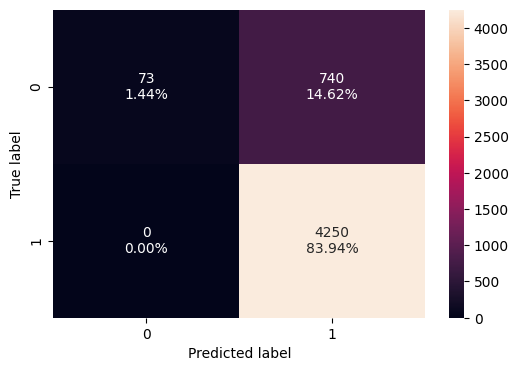

In [110]:
# Creating the confusion matrix for the tuned model's performance on the original training data.
confusion_matrix_sklearn(GBC_org_tuned, X_train, y_train)

In [111]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(GBC_org_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.855,1.000,1.000,0.921


In [112]:
# Saving the tuned model's scores for later comparison.
GBC_org_tuned_val_scores = model_performance_classification_sklearn(GBC_org_tuned, X_val, y_val)

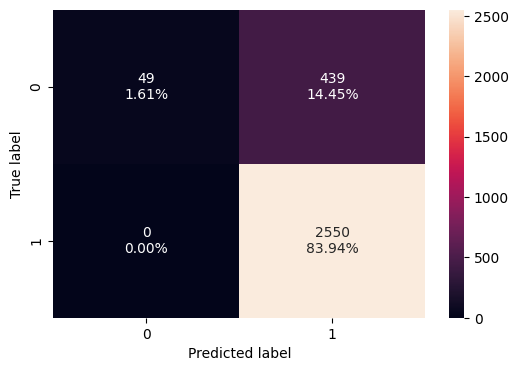

In [113]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(GBC_org_tuned, X_val, y_val)

##### **Random Forest (original training data)**

In [114]:
# Defining the model.
RF_org = RandomForestClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Defining the scorer.
scorer = make_scorer(recall_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=RF_org, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train,y_train)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 2, 'max_samples': 0.5, 'max_features': 'sqrt'} with CV score=0.9865882352941178:


In [115]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
RF_org_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators=110,
    min_samples_leaf=2,
    max_samples=0.5,
    max_features='sqrt')

# Fitting the tuned model to the original traning data.
RF_org_tuned.fit(X_train, y_train)

RandomForestClassifier(max_samples=0.5, min_samples_leaf=2, n_estimators=110,
                       random_state=1)

In [116]:
# Checking the tuned model's performance metrics on the original training data.
model_performance_classification_sklearn(RF_org_tuned, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.983,0.998,0.998,0.990


In [117]:
# Saving the tuned model's scores for later comparison.
RF_org_tuned_train_scores = model_performance_classification_sklearn(RF_org_tuned, X_train, y_train)

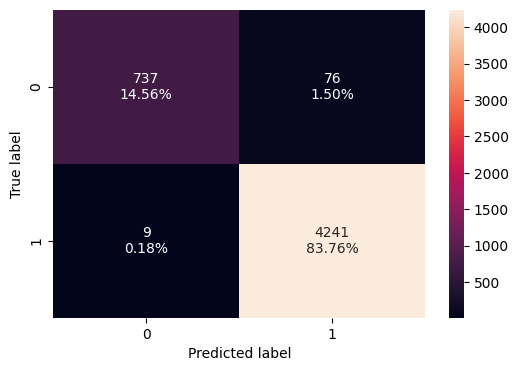

In [118]:
# Creating the confusion matrix for the tuned model's performance on the original training data.
confusion_matrix_sklearn(RF_org_tuned, X_train, y_train)

In [119]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(RF_org_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.940,0.988,0.988,0.965


In [120]:
# Saving the tuned model's scores for later comparison.
RF_org_tuned_val_scores = model_performance_classification_sklearn(RF_org_tuned, X_val, y_val)

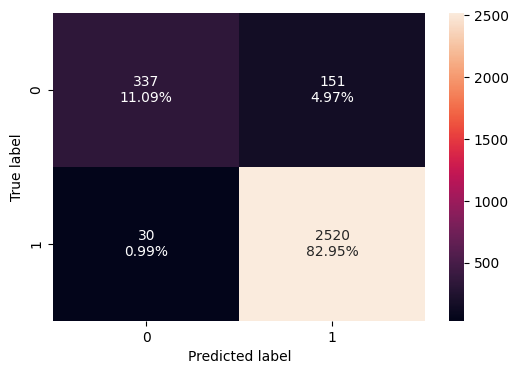

In [121]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(RF_org_tuned, X_val, y_val)

##### **XGBoost (original training data)**

In [122]:
# Defining the model.
XGB_org = XGBClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid = {
            'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Defining the scorer.
scorer = make_scorer(recall_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=XGB_org, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train,y_train)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.9, 'scale_pos_weight': 1, 'n_estimators': 50, 'learning_rate': 0.01, 'gamma': 3} with CV score=1.0:


In [123]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
XGB_org_tuned = XGBClassifier(
    random_state=1,
    subsample=0.9,
    scale_pos_weight=1,
    n_estimators=50,
    learning_rate=0.01,
    gamma=3)

# Fitting the model to the original training data.
XGB_org_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [124]:
 # Checking the tuned model's performance metrics on the original training data.
model_performance_classification_sklearn(XGB_org_tuned, X_train, y_train)

,Accuracy,Recall,Precision,F1
0,0.839,1.000,1.000,0.913


In [125]:
# Saving the tuned model's scores for later comparison.
XGB_org_tuned_train_scores = model_performance_classification_sklearn(XGB_org_tuned, X_train, y_train)

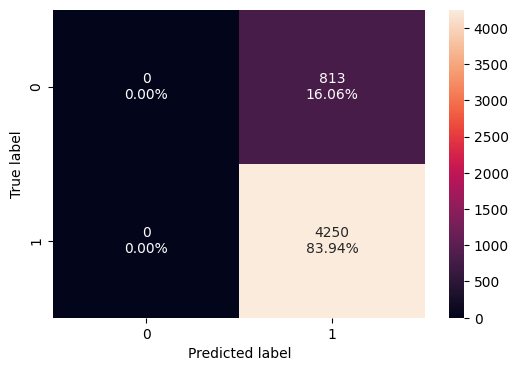

In [126]:
# Creating the confusion matrix for the tuned model's performance on the original training data.
confusion_matrix_sklearn(XGB_org_tuned, X_train, y_train)

In [127]:
 # Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(XGB_org_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.839,1.000,1.000,0.913


In [128]:
# Saving the tuned model's scores for later comparison.
XGB_org_tuned_val_scores = model_performance_classification_sklearn(XGB_org_tuned, X_val, y_val)

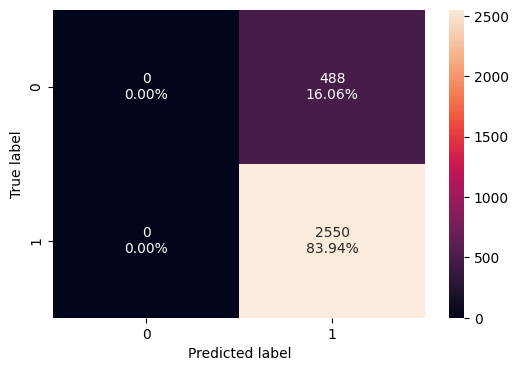

In [129]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(XGB_org_tuned, X_val, y_val)

#### **Models tuning in oversampled data**

##### **Gradient Boost (oversampled training data)**

In [130]:
# Defining the model.
GBC_over = GradientBoostingClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={"init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
            "n_estimators": np.arange(50,110,25),
            "learning_rate": [0.01,0.1,0.05],
            "subsample":[0.7,0.9],
            "max_features":[0.5,0.7,1],
}
# Defining the scorer.
scorer = make_scorer(recall_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=GBC_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_over,y_train_over)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.9491764705882353:


In [131]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
GBC_over_tuned = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.05,
    init=DecisionTreeClassifier(random_state=1))

# Fitting the model to the original training data.
GBC_over_tuned.fit(X_train_over, y_train_over)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

In [132]:
# Checking the tuned model's performance metrics on the oversampled training data.
model_performance_classification_sklearn(GBC_over_tuned, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [133]:
# Saving the tuned model's scores for later comparison.
GBC_over_tuned_train_scores = model_performance_classification_sklearn(GBC_over_tuned, X_train_over, y_train_over)

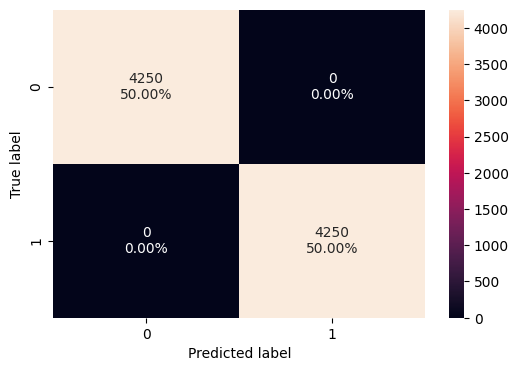

In [134]:
# Creating the confusion matrix for the tuned model's performance on the oversampled training data.
confusion_matrix_sklearn(GBC_over_tuned, X_train_over, y_train_over)

In [135]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(GBC_over_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.933,0.952,0.952,0.960


In [136]:
# Saving the tuned model's scores for later comparison.
GBC_over_tuned_val_scores = model_performance_classification_sklearn(GBC_over_tuned, X_val, y_val)

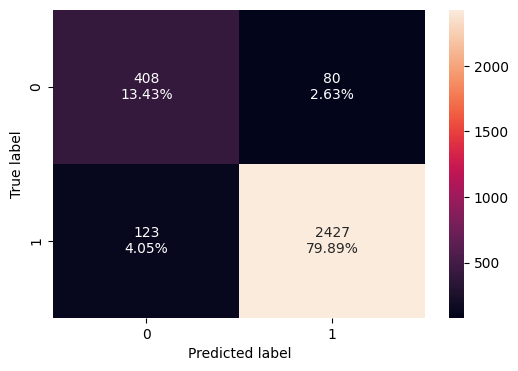

In [137]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(GBC_over_tuned, X_val, y_val)

##### **Random Forest (oversampled training data)**

In [138]:
# Defining the model.
RF_over = RandomForestClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Defining the scorer.
scorer = make_scorer(recall_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=RF_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_over,y_train_over)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9623529411764705:


In [139]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
RF_over_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators=110,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt')

# Fitting the tuned model to the oversampled traning data.
RF_over_tuned.fit(X_train_over, y_train_over)

RandomForestClassifier(max_samples=0.6, n_estimators=110, random_state=1)

In [140]:
# Checking the tuned model's performance metrics on the over sampled training data.
model_performance_classification_sklearn(RF_over_tuned, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.999,0.999,0.999,0.999


In [141]:
# Saving the tuned model's scores for later comparison.
RF_over_tuned_train_scores = model_performance_classification_sklearn(RF_org_tuned, X_train_over, y_train_over)

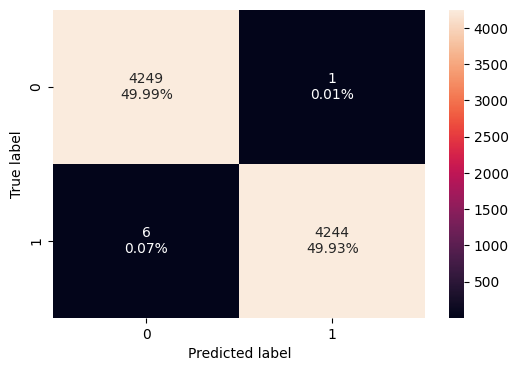

In [142]:
# Creating the confusion matrix for the tuned model's performance on the over sa training data.
confusion_matrix_sklearn(RF_over_tuned, X_train_over, y_train_over)

In [143]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(RF_over_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.949,0.968,0.968,0.970


In [144]:
# Saving the tuned model's scores for later comparison.
RF_over_tuned_val_scores = model_performance_classification_sklearn(RF_over_tuned, X_val, y_val)

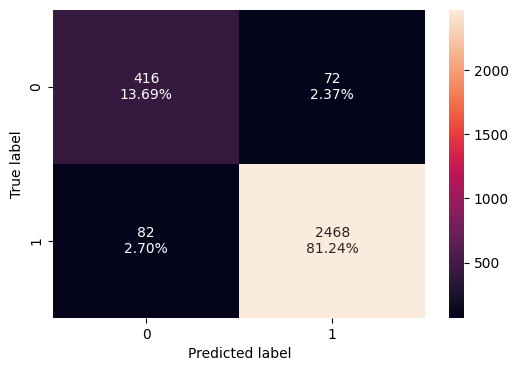

In [145]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(RF_over_tuned, X_val, y_val)

##### **XGBoost (oversampled training data)**

In [146]:
# Defining the model.
XGB_over = XGBClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Defining the scorer.
scorer = make_scorer(recall_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=XGB_over, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_over,y_train_over)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9880000000000001:


In [147]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
XGB_over_tuned = XGBClassifier(
    random_state=1,
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=100,
    learning_rate=0.1,
    gamma=3)

# Fitting the tuned model to the oversampled traning data.
XGB_over_tuned.fit(X_train_over, y_train_over)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [148]:
# Checking the tuned model's performance metrics on the oversampled training data.
model_performance_classification_sklearn(XGB_over_tuned, X_train_over, y_train_over)

,Accuracy,Recall,Precision,F1
0,0.993,1.000,1.000,0.993


In [149]:
# Saving the tuned model's scores for later comparison.
XGB_over_tuned_train_scores = model_performance_classification_sklearn(XGB_over_tuned, X_train_over, y_train_over)

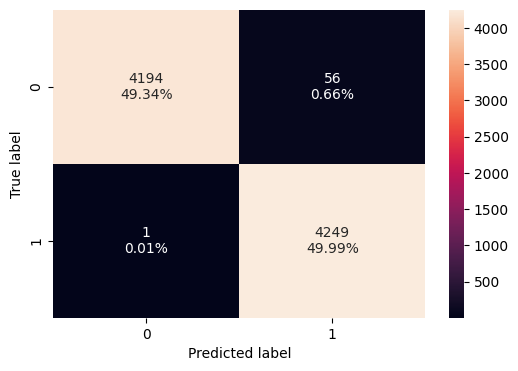

In [150]:
# Creating the confusion matrix for the tuned model's performance on the oversampled training data.
confusion_matrix_sklearn(XGB_over_tuned, X_train_over, y_train_over)

In [151]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(XGB_over_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.965,0.990,0.990,0.979


In [152]:
# Saving the tuned model's scores for later comparison.
XGB_over_tuned_val_scores = model_performance_classification_sklearn(XGB_over_tuned, X_val, y_val)

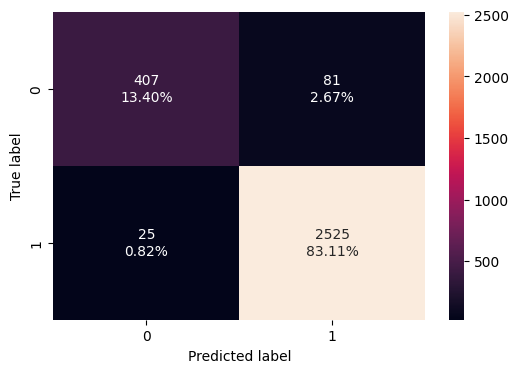

In [153]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(XGB_over_tuned, X_val, y_val)

#### **Models tuning in undersampled data**

##### **Gradient Boost (undersampled training data)**

In [154]:
# Defining the model.
GBC_un = GradientBoostingClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={"init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
            "n_estimators": np.arange(50,110,25),
            "learning_rate": [0.01,0.1,0.05],
            "subsample":[0.7,0.9],
            "max_features":[0.5,0.7,1],
}
# Defining the scorer.
scorer = make_scorer(recall_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=GBC_un, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_un,y_train_un)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'n_estimators': 100, 'max_features': 0.7, 'learning_rate': 0.05, 'init': DecisionTreeClassifier(random_state=1)} with CV score=0.8880860410512762:


In [155]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
GBC_un_tuned = GradientBoostingClassifier(
    random_state=1,
    subsample=0.7,
    n_estimators=100,
    max_features=0.7,
    learning_rate=0.05,
    init=DecisionTreeClassifier(random_state=1))

# Fitting the model to the undersampled training data.
GBC_un_tuned.fit(X_train_un, y_train_un)

GradientBoostingClassifier(init=DecisionTreeClassifier(random_state=1),
                           learning_rate=0.05, max_features=0.7, random_state=1,
                           subsample=0.7)

In [156]:
# Checking the tuned model's performance metrics on the undersampled training data.
model_performance_classification_sklearn(GBC_un_tuned, X_train_un, y_train_un)

,Accuracy,Recall,Precision,F1
0,1.000,1.000,1.000,1.000


In [157]:
# Saving the tuned model's scores for later comparison.
GBC_un_tuned_train_scores = model_performance_classification_sklearn(GBC_un_tuned, X_train_un, y_train_un)

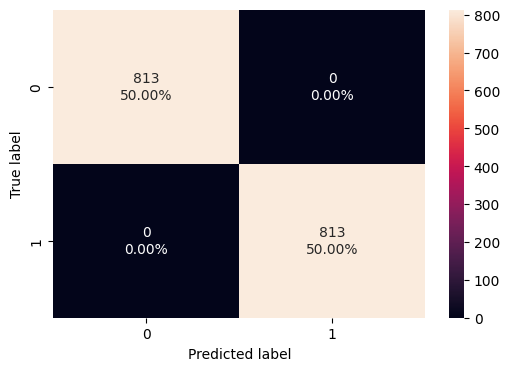

In [158]:
# Creating the confusion matrix for the tuned model's performance on the undersampled training data.
confusion_matrix_sklearn(GBC_un_tuned, X_train_un, y_train_un)

In [159]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(GBC_un_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.885,0.890,0.890,0.929


In [160]:
# Saving the tuned model's scores for later comparison.
GBC_un_tuned_val_scores = model_performance_classification_sklearn(GBC_un_tuned, X_val, y_val)

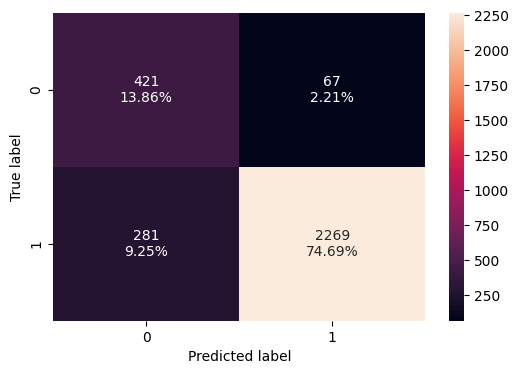

In [161]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(GBC_un_tuned, X_val, y_val)

##### **Random Forest (undersampled training data)**

In [162]:
# Defining the model.
RF_un = RandomForestClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Defining the scorer.
scorer = make_scorer(recall_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=RF_un, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_un,y_train_un)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': 110, 'min_samples_leaf': 1, 'max_samples': 0.6, 'max_features': 'sqrt'} with CV score=0.9274331591305007:


In [163]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
RF_un_tuned = RandomForestClassifier(
    random_state=1,
    n_estimators=110,
    min_samples_leaf=1,
    max_samples=0.6,
    max_features='sqrt')

# Fitting the tuned model to the undersampled traning data.
RF_un_tuned.fit(X_train_un, y_train_un)

RandomForestClassifier(max_samples=0.6, n_estimators=110, random_state=1)

In [164]:
# Checking the tuned model's performance metrics on the undersampled training data.
model_performance_classification_sklearn(RF_un_tuned, X_train_un, y_train_un)

,Accuracy,Recall,Precision,F1
0,0.996,0.993,0.993,0.996


In [165]:
# Saving the tuned model's scores for later comparison.
RF_un_tuned_train_scores = model_performance_classification_sklearn(RF_un_tuned, X_train_un, y_train_un)

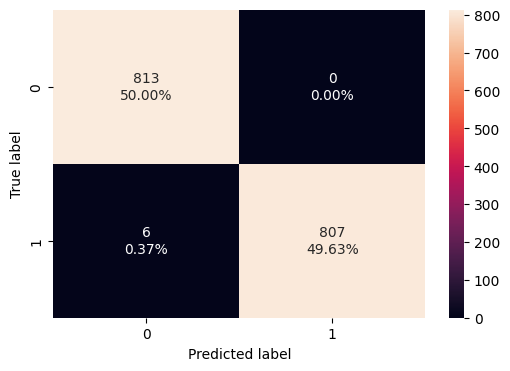

In [166]:
# Creating the confusion matrix for the tuned model's performance on the undersampled training data.
confusion_matrix_sklearn(RF_un_tuned, X_train_un, y_train_un)

In [167]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(RF_un_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.923,0.920,0.920,0.953


In [168]:
# Saving the tuned model's scores for later comparison.
RF_un_tuned_val_scores = model_performance_classification_sklearn(RF_un_tuned, X_val, y_val)

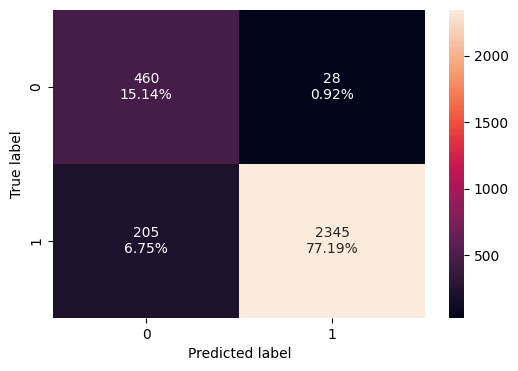

In [169]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(RF_un_tuned, X_val, y_val)

##### **XGBoost (undersampled training data)**

In [170]:
# Defining the model.
XGB_un = XGBClassifier(random_state=1)

# Creating the parameter grid to pass in RandomSearchCV.
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}

# Defining the scorer.
scorer = make_scorer(recall_score)

# Calling RandomizedSearchCV.
randomized_cv = RandomizedSearchCV(estimator=XGB_un, param_distributions=param_grid, n_iter=10, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

# Fitting the parameters in RandomizedSearchCV.
randomized_cv.fit(X_train_un,y_train_un)

# Printing the best parameters from from the RandomizedSearchCV.
print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'subsample': 0.7, 'scale_pos_weight': 5, 'n_estimators': 100, 'learning_rate': 0.1, 'gamma': 3} with CV score=0.9729228205710824:


In [171]:
# Creating the tuned model with the best parameters found in RandomizedSearchCV.
XGB_un_tuned = XGBClassifier(
    random_state=1,
    subsample=0.7,
    scale_pos_weight=5,
    n_estimators=100,
    learning_rate=0.1,
    gamma=3)

# Fitting the tuned model to the undersampled traning data.
XGB_un_tuned.fit(X_train_un, y_train_un)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=3, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [172]:
# Checking the tuned model's performance metrics on the undersampled training data.
model_performance_classification_sklearn(XGB_un_tuned, X_train_un, y_train_un)

,Accuracy,Recall,Precision,F1
0,0.984,1.000,1.000,0.984


In [173]:
# Saving the tuned model's scores for later comparison.
XGB_un_tuned_train_scores = model_performance_classification_sklearn(XGB_un_tuned, X_train_un, y_train_un)

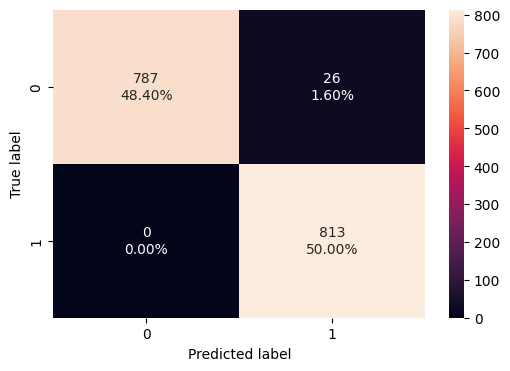

In [174]:
# Creating the confusion matrix for the tuned model's performance on the undersampled training data.
confusion_matrix_sklearn(XGB_un_tuned, X_train_un, y_train_un)

In [175]:
# Checking the tuned model's performance metrics on the validation data.
model_performance_classification_sklearn(XGB_un_tuned, X_val, y_val)

,Accuracy,Recall,Precision,F1
0,0.957,0.969,0.969,0.974


In [176]:
# Saving the tuned model's scores for later comparison.
XGB_un_tuned_val_scores = model_performance_classification_sklearn(XGB_un_tuned, X_val, y_val)

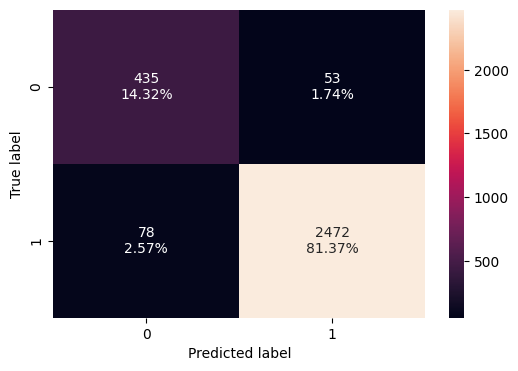

In [177]:
# Creating the confusion matrix for the tuned model's performance on the validation data.
confusion_matrix_sklearn(XGB_un_tuned, X_val, y_val)

## <span style="color:blue">Model Comparison and Final Model Selection

**Training performance comparison:**

In [178]:
# Training performance comparison.

models_train_comp_df = pd.concat(
    [
        GBC_org_tuned_train_scores.T,
        RF_org_tuned_train_scores.T,
        XGB_org_tuned_train_scores.T,
        GBC_over_tuned_train_scores.T,
        RF_over_tuned_train_scores.T,
        XGB_over_tuned_train_scores.T,
        GBC_un_tuned_train_scores.T,
        RF_un_tuned_train_scores.T,
        XGB_un_tuned_train_scores.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
      "Gradient boosting trained with Original data",
      "Random Forest trained with Original data",
      "XGBoost trained with Original data",
      "Gradient boosting trained with Oversampled data",
      "Random Forest trained with Oversampled data",
      "XGBoost trained with Oversampled data",
      "Gradient boosting trained with Undersampled data",
      "Random Forest trained with Undersampled data",
      "XGBoost trained with Undersampled data"
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Gradient boosting trained with Original data,Random Forest trained with Original data,XGBoost trained with Original data,Gradient boosting trained with Oversampled data,Random Forest trained with Oversampled data,XGBoost trained with Oversampled data,Gradient boosting trained with Undersampled data,Random Forest trained with Undersampled data,XGBoost trained with Undersampled data
Accuracy,0.854,0.983,0.839,1.000,0.912,0.993,1.000,0.996,0.984
Recall,1.000,0.998,1.000,1.000,0.998,1.000,1.000,0.993,1.000
Precision,1.000,0.998,1.000,1.000,0.998,1.000,1.000,0.993,1.000
F1,0.920,0.990,0.913,1.000,0.919,0.993,1.000,0.996,0.984


**Validation performance comparison**

In [179]:
# Validation performance comparison

models_val_comp_df = pd.concat(
    [
        GBC_org_tuned_val_scores.T,
        RF_org_tuned_val_scores.T,
        XGB_org_tuned_val_scores.T,
        GBC_over_tuned_val_scores.T,
        RF_over_tuned_val_scores.T,
        XGB_over_tuned_val_scores.T,
        GBC_un_tuned_val_scores.T,
        RF_un_tuned_val_scores.T,
        XGB_un_tuned_val_scores.T,
    ],
    axis=1,
)
models_val_comp_df.columns = [
      "Gradient boosting trained with Original data",
      "Random Forest trained with Original data",
      "XGBoost trained with Original data",
      "Gradient boosting trained with Oversampled data",
      "Random Forest trained with Oversampled data",
      "XGBoost trained with Oversampled data",
      "Gradient boosting trained with Undersampled data",
      "Random Forest trained with Undersampled data",
      "XGBoost trained with Undersampled data"
]
print("Validation performance comparison:")
models_val_comp_df

Validation performance comparison:


,Gradient boosting trained with Original data,Random Forest trained with Original data,XGBoost trained with Original data,Gradient boosting trained with Oversampled data,Random Forest trained with Oversampled data,XGBoost trained with Oversampled data,Gradient boosting trained with Undersampled data,Random Forest trained with Undersampled data,XGBoost trained with Undersampled data
Accuracy,0.855,0.940,0.839,0.933,0.949,0.965,0.885,0.923,0.957
Recall,1.000,0.988,1.000,0.952,0.968,0.990,0.890,0.920,0.969
Precision,1.000,0.988,1.000,0.952,0.968,0.990,0.890,0.920,0.969
F1,0.921,0.965,0.913,0.960,0.970,0.979,0.929,0.953,0.974


### **Test set final performance**

**The 3 models with the highest recall scores were chosen to be ran on the test data.**

* Gradient boosting trained with Original data
* XGBoost trained with Original data
* XGBoost trained with Oversampled data

In [180]:
# Saving the top 3 tuned model's scores for later comparison.
GBC_org_tuned_test_scores = model_performance_classification_sklearn(GBC_org_tuned, X_test, y_test)
XGB_org_tuned_test_scores = model_performance_classification_sklearn(XGB_org_tuned, X_test, y_test)
XGB_over_tuned_test_scores = model_performance_classification_sklearn(XGB_over_tuned, X_test, y_test)

**Top 3 model test performance comparison.**

In [181]:
# Top 3 model test performance comparison.
models_test_comp_df = pd.concat(
    [
        GBC_org_tuned_test_scores.T,
        XGB_org_tuned_test_scores.T,
        XGB_over_tuned_test_scores.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
      "Gradient boosting trained with Original data",
      "XGBoost trained with Original data",
      "XGBoost trained with Undersampled data"
]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Gradient boosting trained with Original data,XGBoost trained with Original data,XGBoost trained with Undersampled data
Accuracy,0.852,0.839,0.965
Recall,1.000,1.000,0.990
Precision,1.000,1.000,0.990
F1,0.919,0.913,0.979


**The final model was selected based on the highest recall score, followed by the highest precision score, and then the highest accuracy on the test data**

* Gradient boosting trained with Original data

**Creating final model.**

In [182]:
# Creating final model.
model_final = GBC_org_tuned

* First exposure to the final model on test data.

In [183]:
# Checking the final tuned model's performance metrics on the test data.
model_performance_classification_sklearn(model_final, X_test, y_test)

,Accuracy,Recall,Precision,F1
0,0.852,1.000,1.000,0.919


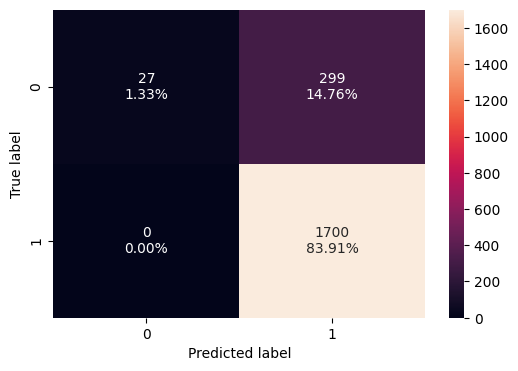

In [184]:
# Creating the confusion matrix for the final tuned model's performance on the test data.
confusion_matrix_sklearn(model_final, X_test, y_test)

**Feature Importances**

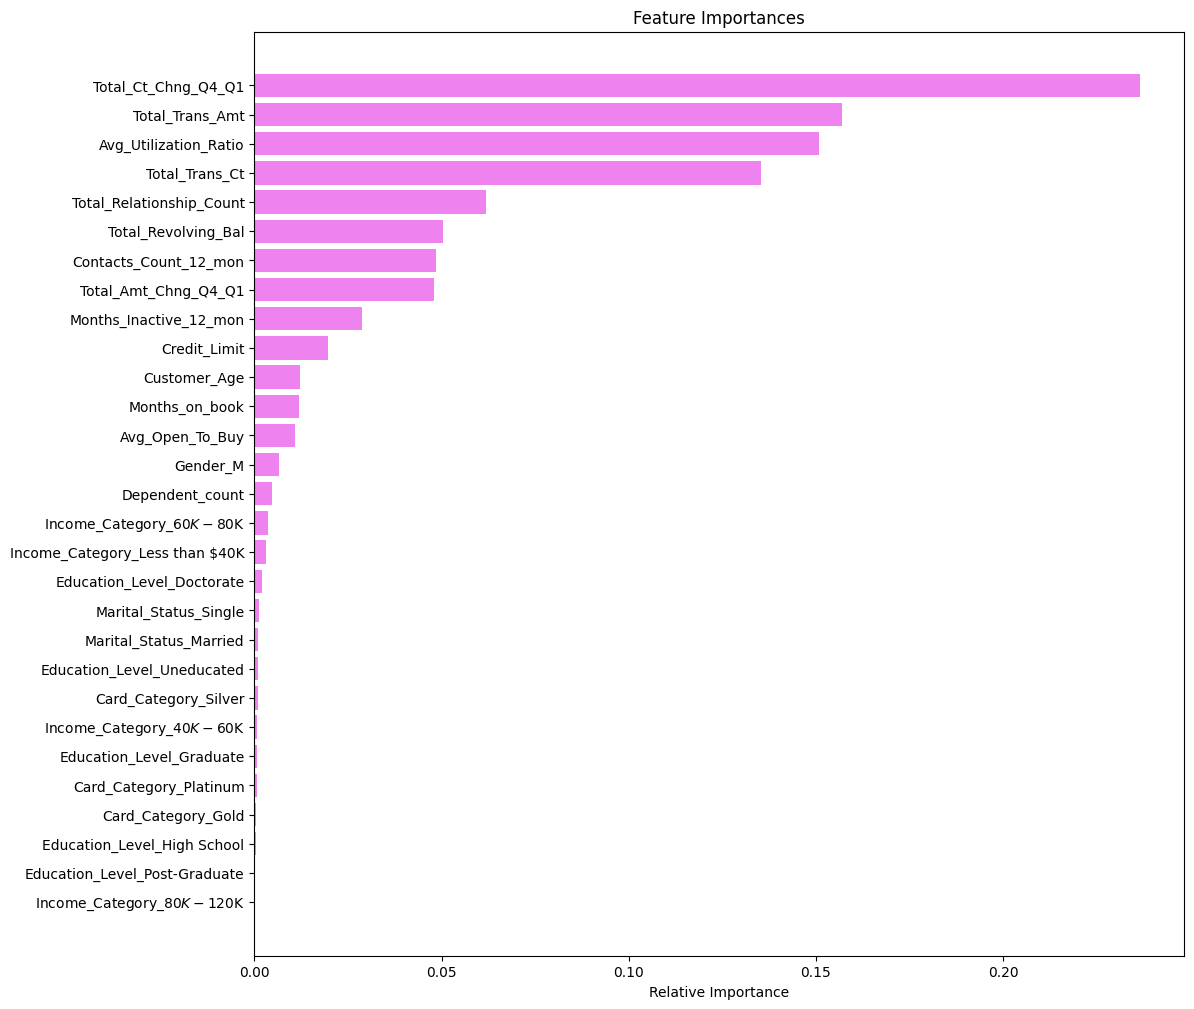

In [185]:
# Creating a figure showing the relative importances of the independent variables.

feature_names = X_train.columns
importances =  model_final.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**The most important features of the data set are:**
  * Total_Trans_Amt
  * Total_Trans_Ct
  * Total_Revolving_Bal
  * Total_Ct_Chng_Q4_Q1
  * Total_Amt_Chng_Q4_Q1
  * Total_Relationship_Ct




# <span style="color:blue">Business Insights and Conclusions


### Business Insights

1. **Transaction Activity**: High values in `Total_Trans_Amt` and `Total_Trans_Ct` suggest that customers with frequent and larger transactions are less likely to leave, indicating satisfaction with the bank's credit card services.

2. **Revolving Balance**: A significant `Total_Revolving_Bal` indicates engaged users who regularly use their credit but may not pay off the balance fully each month, contributing to bank profits through interest fees.

3. **Behavioral Changes**: Sharp changes in transaction count (`Total_Ct_Chng_Q4_Q1`) and amount (`Total_Amt_Chng_Q4_Q1`) can be early indicators of dissatisfaction or a switch to competing services.

4. **Product Engagement**: A higher `Total_Relationship_Count` shows that customers engaged with multiple bank products are more likely to stay, suggesting the effectiveness of cross-selling.

### Conclusions and Recommendations

- **Boost Engagement**: Promote card usage through targeted offers and rewards tailored to customer spending habits to maintain high transaction levels.
  
- **Proactive Monitoring**: Implement systems to monitor and address significant changes in transaction patterns to pre-empt customer attrition.

- **Cross-Selling**: Encourage the adoption of multiple products to enhance customer retention, using personalized product recommendations and benefits education.

- **Retention Initiatives**: Develop loyalty programs for customers who maintain a certain level of transaction activity or revolving balance to incentivize continued usage.

By focusing on enhancing customer engagement and monitoring transaction behaviors, Thera Bank can better manage customer retention and strengthen its financial performance.


---

